# **Experiment Notebook**



---
## 0. Setup Environment

### 0.a Install Mandatory Packages

> Do not modify this code before running it

In [1]:
# Do not modify this code

import os
import sys
from pathlib import Path

COURSE = "36106"
ASSIGNMENT = "AT1"
DATA = "data"

asgmt_path = f"{COURSE}/assignment/{ASSIGNMENT}"
root_path = "./"

print("###### Install required Python packages ######")
! pip install -r https://raw.githubusercontent.com/aso-uts/labs_datasets/main/36106-mlaa/requirements.txt

if os.getenv("COLAB_RELEASE_TAG"):

    from google.colab import drive
    from pathlib import Path

    print("\n###### Connect to personal Google Drive ######")
    gdrive_path = "/content/gdrive"
    drive.mount(gdrive_path)
    root_path = f"{gdrive_path}/MyDrive/"

print("\n###### Setting up folders ######")
folder_path = Path(f"{root_path}/{asgmt_path}/") / DATA
folder_path.mkdir(parents=True, exist_ok=True)
print(f"\nYou can now save your data files in: {folder_path}")

if os.getenv("COLAB_RELEASE_TAG"):
    %cd {folder_path}


###### Install required Python packages ######

###### Connect to personal Google Drive ######
Mounted at /content/gdrive

###### Setting up folders ######

You can now save your data files in: /content/gdrive/MyDrive/36106/assignment/AT1/data
/content/gdrive/MyDrive/36106/assignment/AT1/data


### 0.b Disable Warnings Messages

> Do not modify this code before running it

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### 0.c Install Additional Packages

> If you are using additional packages, you need to install them here using the command: `! pip install <package_name>`

In [3]:
# <Student to fill this section>

### 0.d Import Packages

In [4]:
import ipywidgets as widgets
import pandas as pd
import altair as alt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

---
## A. Project Description


In [5]:
# @title Student Information
wgt_student_name = widgets.Text(
    value=None,
    placeholder='<student to fill this section>',
    description='Student Name:',
    style={'description_width': 'initial'},
    disabled=False
)

wgt_student_id = widgets.Text(
    value=None,
    placeholder='<student to fill this section>',
    description='Student Id:',
    style={'description_width': 'initial'},
    disabled=False
)

widgets.HBox([wgt_student_name, wgt_student_id])

In [6]:
# @title Experiment ID

wgt_experiment_id = widgets.BoundedIntText(
    value=0,
    min=0,
    max=3,
    step=1,
    description='Experiment ID:',
    style={'description_width': 'initial'},
    disabled=False
)
wgt_experiment_id

BoundedIntText(value=0, description='Experiment ID:', max=3, style=DescriptionStyle(description_width='initial…

In [7]:
# @title Business Objective

wgt_business_objective = widgets.Textarea(
    value=None,
    placeholder='<student to fill this section>',
    description='Business Objective:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_business_objective

Textarea(value='', description='Business Objective:', layout=Layout(height='100%', width='auto'), placeholder=…

---
## B. Experiment Description

In [8]:
# @title Experiment Hypothesis

wgt_experiment_hypothesis = widgets.Textarea(
    value=None,
    placeholder='<student to fill this section>',
    description='Experiment Hypothesis:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_experiment_hypothesis

Textarea(value='', description='Experiment Hypothesis:', layout=Layout(height='100%', width='auto'), placehold…

Finding suitable house for rental is very tough based on the tight budget. So based on the preference of the tenants and their budget we will provide recommendation to them so that they can find their desired home without pressuring their budgets.

In [9]:

# @title Experiment Expectations

wgt_experiment_expectations = widgets.Textarea(
    value=None,
    placeholder='<student to fill this section>',
    description='Experiment Expectations:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_experiment_expectations

Textarea(value='', description='Experiment Expectations:', layout=Layout(height='100%', width='auto'), placeho…

we will develop a system that will help the customer to find out their desired home based on their requirement and budget. It will also help the realstate agents to set a suitable price for the  house that they are going to give as rent, in order to prevent it either be too expensive or way too cheap. This system will help both the realestate agents and the tenants financially and in other different ways

---
## C. Data Understanding

### C.1   Load Datasets

> Do not change this code

In [10]:
# Load training data
training_df = pd.read_csv("/content/gdrive/MyDrive/36106/assignment/AT1/data/rental_training.csv") # Removed the extra space after 'data'

In [11]:
# Load validation data
validation_df = pd.read_csv("/content/gdrive/MyDrive/36106/assignment/AT1/data/rental_validation.csv")

In [12]:
# Load testing data
testing_df = pd.read_csv("/content/gdrive/MyDrive/36106/assignment/AT1/data/rental_testing.csv")

### C.2 Explore Training Set

> You can add more cells in this section

In [13]:
# prompt: show me the name of columns

import pandas as pd

# Assuming the file is named 'your_file.ipynb'
# Replace with the actual file name if different

# Load the dataframe
training_df = pd.read_csv("/content/gdrive/MyDrive/36106/assignment/AT1/data/rental_training.csv")

# Print the column names
training_df.columns


Index(['advertised_date', 'number_of_bedrooms', 'rent', 'floor_area', 'level',
       'suburb', 'furnished', 'tenancy_preference', 'number_of_bathrooms',
       'point_of_contact', 'secondary_address', 'building_number',
       'street_name', 'street_suffix', 'prefix', 'first_name', 'last_name',
       'gender', 'phone_number', 'email'],
      dtype='object')

In [14]:
# prompt: show me the datatype of those columns

# Print data types of each column in the training dataset
training_df.dtypes


,0
advertised_date,object
number_of_bedrooms,int64
rent,float64
floor_area,int64
level,object
suburb,object
furnished,object
tenancy_preference,object
number_of_bathrooms,int64
point_of_contact,object


In [15]:
# prompt: now first convert the "advertised_date" into date and time then create a visualization of the month when most of the advertisements have been posted

import pandas as pd
# Convert 'advertised_date' to datetime objects
training_df['advertised_date'] = pd.to_datetime(training_df['advertised_date'])

# Extract the month from the 'advertised_date' column
training_df['month'] = training_df['advertised_date'].dt.month

# Group by month and count the number of advertisements in each month
monthly_counts = training_df.groupby('month')['advertised_date'].count()

# Create a bar chart visualization
alt.Chart(monthly_counts.reset_index()).mark_bar().encode(
    x='month:O',
    y='advertised_date:Q'
).properties(
    title='Number of Advertisements Posted per Month'
).show()


alt.Chart(...)

In [16]:
df = training_df.copy()


In [17]:
def split_level(value: str):
    """
    Splits a level string into two parts:
      - rented_level:
            If the token (text before " out of ") contains "upper", then use the numeric part (the text after " out of ").
            If it contains "ground", "lower", or "basement" (and not "upper"), then set rented_level = "0".
            Otherwise (if numeric already), leave it as the token.
      - level_no:
            The text after " out of " if available; otherwise, the original value.

    When " out of " is not present:
      - If the value is fully numeric, both columns are set to that number.
      - For non-numeric values:
            If it contains "upper", then both columns are set to the original value.
            If it contains "ground", "lower", or "basement", then set rented_level = "0" and level_no = the original value.
            Otherwise, both columns are set to the original value.
    """
    value = str(value).strip()

    if " out of " in value:
        # Split the string into two parts: token and the number part.
        parts = value.split(" out of ", 1)
        token = parts[0].strip()         # e.g., "Ground", "Upper Basement", "1", etc.
        level_no = parts[1].strip()       # expected to be a number in string format.
        token_lower = token.lower()

        if "upper" in token_lower:
            # For Upper entries, use the numeric part for rented_level.
            rented_level = level_no
        elif any(x in token_lower for x in ["ground", "basement", "lower"]):
            # For Ground, Lower, or Basement entries, set rented_level to 0.
            rented_level = "0"
        else:
            # Otherwise, keep the token (which might be numeric already).
            rented_level = token

        return pd.Series([rented_level, level_no])
    else:
        # When " out of " is missing.
        if value.isdigit():
            # If the value is a digit, assign it to both columns.
            return pd.Series([value, value])
        else:
            token_lower = value.lower()
            if "upper" in token_lower:
                # For upper values without "out of", both columns are the same.
                return pd.Series([value, value])
            elif any(x in token_lower for x in ["ground", "basement", "lower"]):
                # For Ground, Lower, or Basement without "out of", set rented_level to 0.
                return pd.Series(["0", value])
            else:
                # Otherwise, assign the same value to both columns.
                return pd.Series([value, value])

# Example of applying the function on a DataFrame.
# Assuming your DataFrame 'df' has a column named "level":
df = pd.read_csv("rental_training.csv")  # Ensure the CSV file is in your working directory

df[["rented_level", "level_no"]] = df["level"].apply(split_level)

# Display a preview of the results.
print(df[["level", "rented_level", "level_no"]].head(20))

              level rented_level level_no
0   Ground out of 2            0        2
1        1 out of 3            1        3
2        1 out of 3            1        3
3        1 out of 2            1        2
4   Ground out of 1            0        1
5   Ground out of 4            0        4
6        1 out of 2            1        2
7        1 out of 2            1        2
8        1 out of 3            1        3
9        1 out of 4            1        4
10       1 out of 1            1        1
11       1 out of 4            1        4
12       1 out of 2            1        2
13  Ground out of 2            0        2
14       1 out of 1            1        1
15       1 out of 2            1        2
16  Ground out of 2            0        2
17  Ground out of 3            0        3
18       1 out of 2            1        2
19       2 out of 3            2        3


In [18]:
# prompt: check the value type of "rented_level" and "level_no" if they are int/floating or not

import pandas as pd
# Assuming the DataFrame 'df' is already created as shown in your code.

def check_numeric_columns(df, columns):
  """
  Checks if the specified columns in a DataFrame contain integer or floating-point values.

  Args:
    df: The Pandas DataFrame.
    columns: A list of column names to check.

  Returns:
    A dictionary where keys are column names and values are booleans
    indicating whether the column contains numeric values.
  """
  results = {}
  for column in columns:
    try:
      pd.to_numeric(df[column])
      results[column] = True  # Can be converted to numeric, so considered numeric
    except ValueError:
      results[column] = False # Cannot be converted to numeric
  return results


# Check if 'rented_level' and 'level_no' contain numeric values
numeric_check_results = check_numeric_columns(df, ['rented_level', 'level_no'])

print("Numeric Value Check:")
for column, is_numeric in numeric_check_results.items():
  print(f"- {column}: {is_numeric}")


Numeric Value Check:
- rented_level: True
- level_no: False


In [19]:
# prompt: check the value type of level_no

print(type(df['level_no'][0]))


<class 'str'>


In [20]:
# prompt: show me the number of string type value for level_no column

# Assuming the DataFrame 'df' is already created as shown in your code.

# Count the number of string type values in the 'level_no' column
string_level_no_count = df['level_no'].apply(lambda x: isinstance(x, str)).sum()

print(f"The number of string type values in the 'level_no' column is: {string_level_no_count}")


The number of string type values in the 'level_no' column is: 3434


In [21]:
# prompt: convert the 'level_no' from string to int/float also show the number of rows has successfully been converted  and the number of rows where the transformation has been failed

import pandas as pd
# Assuming the DataFrame 'df' is already created as shown in your code.

def convert_to_numeric(df, column_name):
  """
  Attempts to convert a specified column in a DataFrame to numeric (int/float).

  Args:
    df: The Pandas DataFrame.
    column_name: The name of the column to convert.

  Returns:
    A tuple containing:
      - A new DataFrame with the column converted to numeric (if possible).
      - The number of rows successfully converted.
      - The number of rows where the conversion failed.
  """
  successful_conversions = 0
  failed_conversions = 0
  new_df = df.copy()

  try:
    new_df[column_name] = pd.to_numeric(df[column_name], errors='coerce')
    successful_conversions = new_df[column_name].notna().sum()
    failed_conversions = new_df[column_name].isna().sum()

  except Exception as e:
    print(f"Error during conversion: {e}")

  return new_df, successful_conversions, failed_conversions


# Apply the function to the 'level_no' column
new_df, successful_count, failed_count = convert_to_numeric(df, 'level_no')

print(f"Number of rows successfully converted for 'level_no': {successful_count}")
print(f"Number of rows where conversion failed for 'level_no': {failed_count}")

# Now 'new_df' contains the DataFrame with the 'level_no' column converted to numeric
# (or NaN where conversion failed).


Number of rows successfully converted for 'level_no': 3433
Number of rows where conversion failed for 'level_no': 1


In [22]:
# prompt: show me the value of the row where the transformation failed

# Assuming the DataFrame 'df' and the function 'convert_to_numeric' are defined as shown in your code.

def find_rows_with_failed_conversion(df, column_name):
  """
  Finds the rows in a DataFrame where the conversion to numeric failed for a specified column.

  Args:
    df: The Pandas DataFrame.
    column_name: The name of the column where conversion was attempted.

  Returns:
    A new DataFrame containing only the rows where conversion to numeric failed.
  """
  new_df, successful_count, failed_count = convert_to_numeric(df, column_name)
  return new_df[new_df[column_name].isna()]

# Find rows where the conversion of 'level_no' failed
failed_rows = find_rows_with_failed_conversion(df, 'level_no')

# Print the values of the rows where the conversion failed
print("Rows where 'level_no' conversion failed:")
failed_rows


Rows where 'level_no' conversion failed:


,advertised_date,number_of_bedrooms,rent,floor_area,level,suburb,furnished,tenancy_preference,number_of_bathrooms,point_of_contact,...,street_name,street_suffix,prefix,first_name,last_name,gender,phone_number,email,rented_level,level_no
2127,2022-05-23,1,578.0,450,Ground,Adelaide,Furnished,Bachelors/Family,1,Contact Owner,...,Jacqueline Slope,Promenade,Mrs.,Pamela,Huang,f,07 9016 1546,xbarrett@example.net,0,NaN


In [23]:
import pandas as pd

def split_level(value: str):
    """
    Splits a level string into two parts:
      - rented_level:
            If the token (text before " out of ") contains "upper", then use the numeric part (the text after " out of ").
            If it contains "ground", "lower", or "basement" (without "upper"), then set rented_level to "0".
            Otherwise (if numeric already), leave it as the token.
      - level_no:
            The text after " out of " if available; otherwise, the original value.

    When " out of " is not present:
      - If the value is fully numeric, both columns are that number.
      - For textual values:
            If it contains "upper", then both columns are the same.
            If it contains "ground", "lower", or "basement", then rented_level is set to "0" and level_no remains the original value.
            Otherwise, both columns are set to the original value.
    """
    value = str(value).strip()

    if " out of " in value:
        parts = value.split(" out of ", 1)
        token = parts[0].strip()         # e.g., "Ground", "Upper Basement", "1", etc.
        level_no = parts[1].strip()       # expected to be a number in string format.
        token_lower = token.lower()

        if "upper" in token_lower:
            rented_level = level_no
        elif any(x in token_lower for x in ["ground", "basement", "lower"]):
            rented_level = "0"
        else:
            rented_level = token

        return pd.Series([rented_level, level_no])
    else:
        if value.isdigit():
            return pd.Series([value, value])
        else:
            token_lower = value.lower()
            if "upper" in token_lower:
                return pd.Series([value, value])
            elif any(x in token_lower for x in ["ground", "basement", "lower"]):
                return pd.Series(["0", value])
            else:
                return pd.Series([value, value])

# Read the CSV file into a DataFrame.
df = pd.read_csv("rental_training.csv")

# Apply the split_level function to create two new columns.
df[["rented_level", "level_no"]] = df["level"].apply(split_level)

# Drop any rows where 'level_no' is NaN or null.
df.dropna(subset=["level_no"], inplace=True)

# Display a preview of the resulting DataFrame.
print(df[["level", "rented_level", "level_no"]].head(20))

# (Optional) Save the updated DataFrame to a new CSV file.
# df.to_csv("rental_training_updated.csv", index=False)


              level rented_level level_no
0   Ground out of 2            0        2
1        1 out of 3            1        3
2        1 out of 3            1        3
3        1 out of 2            1        2
4   Ground out of 1            0        1
5   Ground out of 4            0        4
6        1 out of 2            1        2
7        1 out of 2            1        2
8        1 out of 3            1        3
9        1 out of 4            1        4
10       1 out of 1            1        1
11       1 out of 4            1        4
12       1 out of 2            1        2
13  Ground out of 2            0        2
14       1 out of 1            1        1
15       1 out of 2            1        2
16  Ground out of 2            0        2
17  Ground out of 3            0        3
18       1 out of 2            1        2
19       2 out of 3            2        3


In [24]:
# Check if any rows have NaN/null in the 'level_no' column
if df["level_no"].isna().any():
    print("There are rows with NaN/null in 'level_no':")
    print(df[df["level_no"].isna()])
else:
    print("No rows with NaN/null in 'level_no'")


No rows with NaN/null in 'level_no'


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3434 entries, 0 to 3433
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   advertised_date      3434 non-null   object 
 1   number_of_bedrooms   3434 non-null   int64  
 2   rent                 3434 non-null   float64
 3   floor_area           3434 non-null   int64  
 4   level                3434 non-null   object 
 5   suburb               3434 non-null   object 
 6   furnished            3434 non-null   object 
 7   tenancy_preference   3434 non-null   object 
 8   number_of_bathrooms  3434 non-null   int64  
 9   point_of_contact     3434 non-null   object 
 10  secondary_address    3434 non-null   object 
 11  building_number      3434 non-null   int64  
 12  street_name          3434 non-null   object 
 13  street_suffix        3434 non-null   object 
 14  prefix               2274 non-null   object 
 15  first_name           3434 non-null   o

In [26]:
df.describe()

,number_of_bedrooms,rent,floor_area,number_of_bathrooms,building_number
count,3434.000000,3434.000000,3434.000000,3434.000000,3434.000000
mean,2.022423,595.080664,919.708794,1.881188,189.853815
std,0.813388,105.380805,588.741127,0.850203,284.860733
min,1.000000,557.000000,20.000000,1.000000,0.000000
25%,1.000000,567.000000,550.000000,1.000000,7.000000
50%,2.000000,574.000000,800.000000,2.000000,46.000000
75%,2.000000,590.000000,1186.000000,2.000000,268.750000
max,6.000000,5037.000000,8000.000000,10.000000,998.000000


In [27]:
df.isna().sum()

,0
advertised_date,0
number_of_bedrooms,0
rent,0
floor_area,0
level,0
suburb,0
furnished,0
tenancy_preference,0
number_of_bathrooms,0
point_of_contact,0


In [28]:
df.value_counts()

advertised_date  number_of_bedrooms  rent   floor_area  level            suburb    furnished       tenancy_preference  number_of_bathrooms  point_of_contact  secondary_address  building_number  street_name         street_suffix  prefix  first_name  last_name  gender  phone_number     email                      rented_level  level_no
2022-06-26       3                   658.0  1800        1 out of 3       Adelaide  Semi-Furnished  Bachelors/Family    3                    Contact Owner     Level 3            1                Salinas Rosebowl    Tarn           Dr.     Denise      Welch      f       (02).8949.5159   davidhenry@example.com     1             3           1
2022-04-13       3                   888.0  1800        10 out of 11     Sydney    Furnished       Family              4                    Contact Agent     05/                26               William Crest       Round          Dr.     Daniel      Castro     m       02279886         ehorton@example.com        10            11          1
2022-06-26       2                   567.0  900         Ground out of 2  Canberra  Semi-Furnished  Bachelors           1                    Contact Owner     Level 9            40               Torres Cutting      Meander        Mr.     Jason       Richards   m       +61-404-410-266  jacobedwards@example.net   0             2           1
                                     565.0  1600        Ground out of 2  Canberra  Semi-Furnished  Bachelors           1                    Contact Owner     075/               648              Costa Trailer       Tarn           Dr.     Christian   Gomez      m       +61-7-0085-2335  obrienmorgan@example.net   0             2           1
                                     563.0  450         1 out of 3       Adelaide  Unfurnished     Bachelors/Family    1                    Contact Owner     Unit 87            18               Brown Front         Wade           Mrs.    Shelly      Lewis      f       +61 438 431 952  gentrynatalie@example.org  1             3           1
                                                                                                                                                                                                                                                                                                                                                 ..
2022-04-24       2                   565.0  750         2 out of 4       Canberra  Semi-Furnished  Bachelors/Family    2                    Contact Owner     606/               1                Lisa Loop           Dell           Dr.     Charlene    Poole      f       +61 7 9851 7460  tjohnson@example.org       2             4           1
                 1                   562.0  350         Ground out of 3  Canberra  Semi-Furnished  Bachelors/Family    1                    Contact Owner     Unit 23            31               Nicole Grange       Port           Mrs.    Mary        White      f       0415-302-221     phillipdiaz@example.com    0             3           1
2022-04-23       3                   601.0  1700        Ground out of 2  Canberra  Unfurnished     Bachelors/Family    2                    Contact Owner     Level 1            67               James Retreat       Cross          Mrs.    Martina     Iglesia    f       (03)83393621     ccopeland@example.net      0             2           1
                 2                   574.0  1000        Ground out of 2  Canberra  Unfurnished     Bachelors/Family    2                    Contact Owner     Level 8            0                Christopher Roads   Gates          Mr.     Derek       Warren     m       03 5104 7299     smithchad@example.org      0             2           1
                                     565.0  650         1 out of 2       Canberra  Unfurnished     Bachelors/Family    1                    Contact Owner     Apt. 261           90               Anderson Courtyard  Sound          Mrs.    Lori        White      f    

In [29]:
df.value_counts().sort_index()

advertised_date  number_of_bedrooms  rent   floor_area  level            suburb    furnished       tenancy_preference  number_of_bathrooms  point_of_contact  secondary_address  building_number  street_name         street_suffix  prefix  first_name  last_name  gender  phone_number     email                       rented_level  level_no
2022-04-13       3                   888.0  1800        10 out of 11     Sydney    Furnished       Family              4                    Contact Agent     05/                26               William Crest       Round          Dr.     Daniel      Castro     m       02279886         ehorton@example.com         10            11          1
2022-04-23       1                   564.0  800         Ground out of 1  Canberra  Unfurnished     Bachelors/Family    1                    Contact Owner     Suite 955          844              Hall Green          Terrace        Dr.     Brian       Evans      m       (03)-7850-0987   shelly19@example.org        0             1           1
                 2                   565.0  650         1 out of 2       Canberra  Unfurnished     Bachelors/Family    1                    Contact Owner     Apt. 261           90               Anderson Courtyard  Sound          Mrs.    Lori        White      f       +61-3-6455-1105  kimberlyward@example.org    1             2           1
                                     574.0  1000        Ground out of 2  Canberra  Unfurnished     Bachelors/Family    2                    Contact Owner     Level 8            0                Christopher Roads   Gates          Mr.     Derek       Warren     m       03 5104 7299     smithchad@example.org       0             2           1
                 3                   601.0  1700        Ground out of 2  Canberra  Unfurnished     Bachelors/Family    2                    Contact Owner     Level 1            67               James Retreat       Cross          Mrs.    Martina     Iglesia    f       (03)83393621     ccopeland@example.net       0             2           1
                                                                                                                                                                                                                                                                                                                                                  ..
2022-06-26       2                   578.0  1000        Ground out of 4  Brisbane  Semi-Furnished  Bachelors/Family    2                    Contact Owner     Flat 00            276              Baird Cross         Triangle       Mr.     Joseph      Solomon    m       +61.435.782.446  rbartlett@example.com       0             4           1
                 3                   566.0  1430        Ground out of 2  Canberra  Semi-Furnished  Bachelors/Family    1                    Contact Owner     7/                 1                Cox Quadrangle      Quadrangle     Mrs.    Nicole      Phillips   f       03-5678-4868     whitegeorge@example.net     0             2           1
                                     574.0  225         Ground out of 1  Perth     Unfurnished     Bachelors/Family    3                    Contact Owner     Unit 01            9                Gary Route          Crest          Dr.     Rachel      Perry      f       +61 401 063 997  fhenry@example.org          0             1           1
                                     606.0  1100        21 out of 22     Sydney    Unfurnished     Family              2                    Contact Owner     Level 2            8                Brown Crossing      Chase          Dr.     James       Wade       m       (08) 3185 4633   peterscristian@example.com  21            22          1
                                     658.0  1800        1 out of 3       Adelaide  Semi-Furnished  Bachelors/Family    3                    Contact Owner     Level 3            1                Salinas Rosebowl    Tarn           Dr.     Denise      Welch

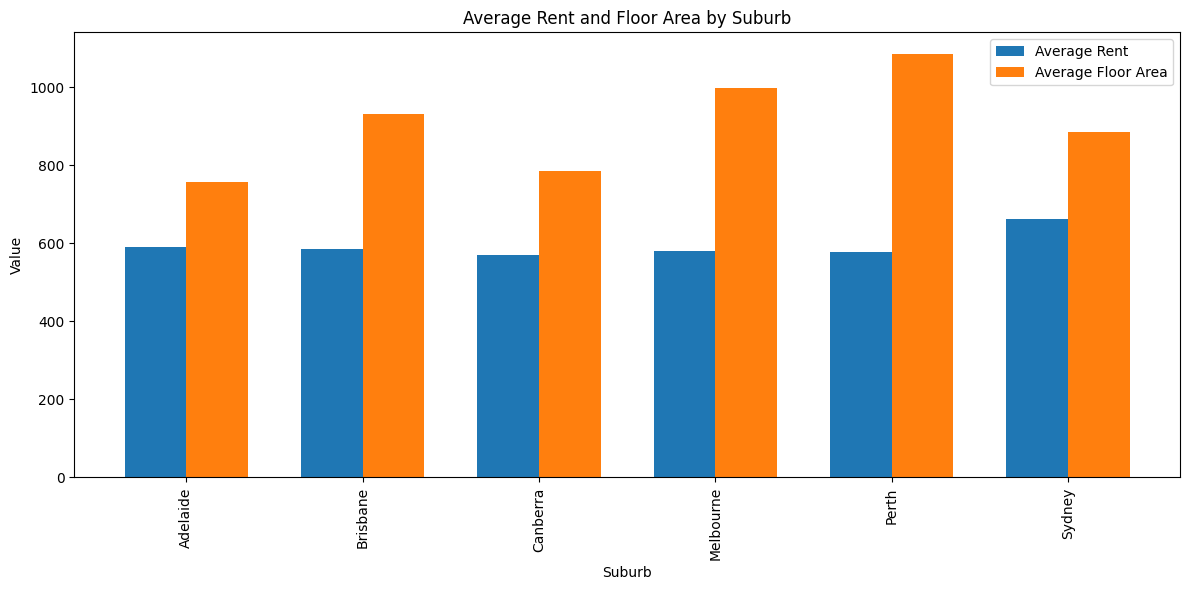

In [30]:
# Group by suburb and compute the mean rent and floor_area
grouped = df.groupby("suburb")[["rent", "floor_area"]].mean().reset_index()
grouped = grouped.sort_values("suburb")  # optional: sort by suburb name

# Create a grouped bar chart
x = np.arange(len(grouped))        # the label locations
width = 0.35                       # width of the bars

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width/2, grouped["rent"], width, label="Average Rent")
bars2 = ax.bar(x + width/2, grouped["floor_area"], width, label="Average Floor Area")

# Labeling the plot
ax.set_xticks(x)
ax.set_xticklabels(grouped["suburb"], rotation=90)
ax.set_xlabel("Suburb")
ax.set_ylabel("Value")
ax.set_title("Average Rent and Floor Area by Suburb")
ax.legend()

plt.tight_layout()
plt.show()


In [31]:
# prompt: rent vs number_of_bedrooms suburb wise

# Assuming your DataFrame is named 'df' and it has columns 'suburb', 'rent', 'number_of_bedrooms'.
# Group by suburb and calculate the mean rent for each suburb.

avg_rent_by_suburb = df.groupby(['suburb', 'number_of_bedrooms'])['rent'].mean().reset_index()

# Create an Altair chart showing the relationship between rent and number of bedrooms per suburb
alt.Chart(avg_rent_by_suburb).mark_line().encode(
    x='number_of_bedrooms:Q',  # Number of bedrooms on the x-axis
    y='rent:Q',               # Rent on the y-axis
    color='suburb:N'           # Use different colors for each suburb
).properties(
    title='Average Rent vs Number of Bedrooms (Suburb Wise)'
)


alt.Chart(...)

In [32]:
# prompt: there are two column "furnished" and "rent" create visual based on these two columns and create visuals suburb wise

# Assuming your DataFrame is named 'df' and it has columns 'suburb', 'furnished', 'rent'.

# Group the data by suburb and furnished status, then calculate the average rent.
avg_rent_by_suburb_furnished = df.groupby(['suburb', 'furnished'])['rent'].mean().reset_index()

# Create an Altair chart to show the average rent for furnished and unfurnished properties in each suburb.
alt.Chart(avg_rent_by_suburb_furnished).mark_bar().encode(
    x='suburb:N',
    y='rent:Q',
    color='furnished:N',
    column='furnished:N'  # Use 'furnished' status to create separate columns for comparison
).properties(
    title='Average Rent by Suburb and Furnished Status'
)


alt.Chart(...)

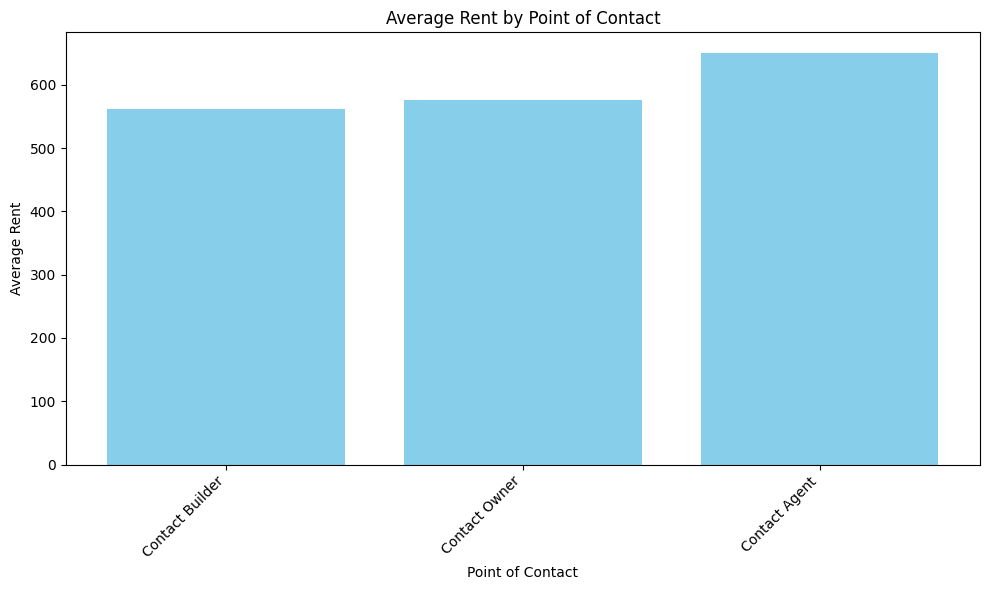

In [33]:
# Group by 'point_of_contact' and calculate the average rent
grouped = df.groupby("point_of_contact")["rent"].mean().reset_index()

# Optional: sort the grouped data by average rent for better visualization
grouped = grouped.sort_values("rent")

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(grouped["point_of_contact"], grouped["rent"], color="skyblue")
plt.xlabel("Point of Contact")
plt.ylabel("Average Rent")
plt.title("Average Rent by Point of Contact")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [34]:
# prompt: show me the number of rent vs gender suburbwise

# Assuming your DataFrame is named 'df' and it has columns 'suburb', 'rent', 'gender'.

# Group by suburb and gender, then calculate the average rent.
avg_rent_by_suburb_gender = df.groupby(['suburb', 'gender'])['rent'].mean().reset_index()

# Create an Altair chart to show the average rent for each gender in each suburb.
alt.Chart(avg_rent_by_suburb_gender).mark_bar().encode(
    x='suburb:N',
    y='rent:Q',
    color='gender:N',
    column='gender:N'  # Use 'gender' to create separate columns for comparison
).properties(
    title='Average Rent by Suburb and Gender'
)


alt.Chart(...)

In [35]:
# @title Training Set Insights

wgt_eda_training_set_insights = widgets.Textarea(
    value=None,
    placeholder='<student to fill this section>',
    description='Training Set Insights:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_eda_training_set_insights

Textarea(value='', description='Training Set Insights:', layout=Layout(height='100%', width='auto'), placehold…

The dataset comprises 3,434 entries across 22 columns that capture comprehensive information on rental properties. Key property details include the number of bedrooms (averaging about 2 per property), rent (with a mean of approximately 595), floor area (mean close to 920 with a wide range from 20 to 8,000), number of bathrooms (average around 1.88), and building number (mean of 190, with notable variation). The data is largely complete, with no missing values in most columns; however, the "prefix" field has 1,160 missing entries and "last_name" is missing for one record. Additionally, columns like "level", "rented_level", and "level_no" provide insights into property positioning, where custom logic was applied to assign appropriate values. Overall, the dataset offers a rich, mostly complete view of rental property listings, allowing for detailed analysis of market characteristics and trends.

### C.3 Explore Validation Set

> You can add more cells in this section

In [36]:
# prompt: drop street_suffix column

# Assuming your DataFrame is named 'df'
df = validation_df.drop('street_suffix', axis=1)


In [37]:
# prompt: show me the columns name


# Print the column names
df.columns


Index(['advertised_date', 'number_of_bedrooms', 'rent', 'floor_area', 'level',
       'suburb', 'furnished', 'tenancy_preference', 'number_of_bathrooms',
       'point_of_contact', 'secondary_address', 'building_number',
       'street_name', 'prefix', 'first_name', 'last_name', 'gender',
       'phone_number', 'email'],
      dtype='object')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   advertised_date      1320 non-null   object 
 1   number_of_bedrooms   1320 non-null   int64  
 2   rent                 1320 non-null   float64
 3   floor_area           1320 non-null   int64  
 4   level                1320 non-null   object 
 5   suburb               1320 non-null   object 
 6   furnished            1320 non-null   object 
 7   tenancy_preference   1320 non-null   object 
 8   number_of_bathrooms  1320 non-null   int64  
 9   point_of_contact     1320 non-null   object 
 10  secondary_address    1320 non-null   object 
 11  building_number      1320 non-null   int64  
 12  street_name          1320 non-null   object 
 13  prefix               855 non-null    object 
 14  first_name           1320 non-null   object 
 15  last_name            1319 non-null   o

In [39]:
df.describe()

,number_of_bedrooms,rent,floor_area,number_of_bathrooms,building_number
count,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000
mean,2.091667,596.413636,959.723485,1.946212,189.813636
std,0.819543,67.974174,645.170039,0.879891,283.228988
min,1.000000,557.000000,10.000000,1.000000,0.000000
25%,2.000000,568.000000,550.000000,1.000000,6.000000
50%,2.000000,574.000000,825.500000,2.000000,49.000000
75%,3.000000,594.000000,1200.000000,2.000000,270.000000
max,6.000000,1451.000000,6000.000000,7.000000,996.000000


In [40]:
# prompt: now first convert the "advertised_date" into date and time then create a visualization of the month when most of the advertisements have been posted


# Print the column names
df.columns


# Print data types of each column in the training dataset
df.dtypes


# Convert 'advertised_date' to datetime objects
df['advertised_date'] = pd.to_datetime(df['advertised_date'])

# Extract the month from the 'advertised_date' column
df['month'] = df['advertised_date'].dt.month

# Group by month and count the number of advertisements in each month
monthly_counts = df.groupby('month')['advertised_date'].count()

# Create a bar chart visualization
alt.Chart(monthly_counts.reset_index()).mark_bar().encode(
    x='month:O',
    y='advertised_date:Q'
).properties(
    title='Number of Advertisements Posted per Month'
).show()


alt.Chart(...)

In [41]:
# prompt: bar graph number of bed vs rent different visual group by suburb

# Assuming your DataFrame is named 'df' and it has columns 'suburb', 'rent', 'number_of_bedrooms'.
# Group by suburb and number of bedrooms, then calculate the average rent.
avg_rent_by_suburb_bedrooms = df.groupby(['suburb', 'number_of_bedrooms'])['rent'].mean().reset_index()

# Create an Altair chart to show the average rent for different number of bedrooms in each suburb.
alt.Chart(avg_rent_by_suburb_bedrooms).mark_bar().encode(
    x='suburb:N',
    y='rent:Q',
    color='number_of_bedrooms:N',
    column='number_of_bedrooms:N'  # Use 'number_of_bedrooms' to create separate columns for comparison
).properties(
    title='Average Rent by Suburb and Number of Bedrooms'
)


alt.Chart(...)

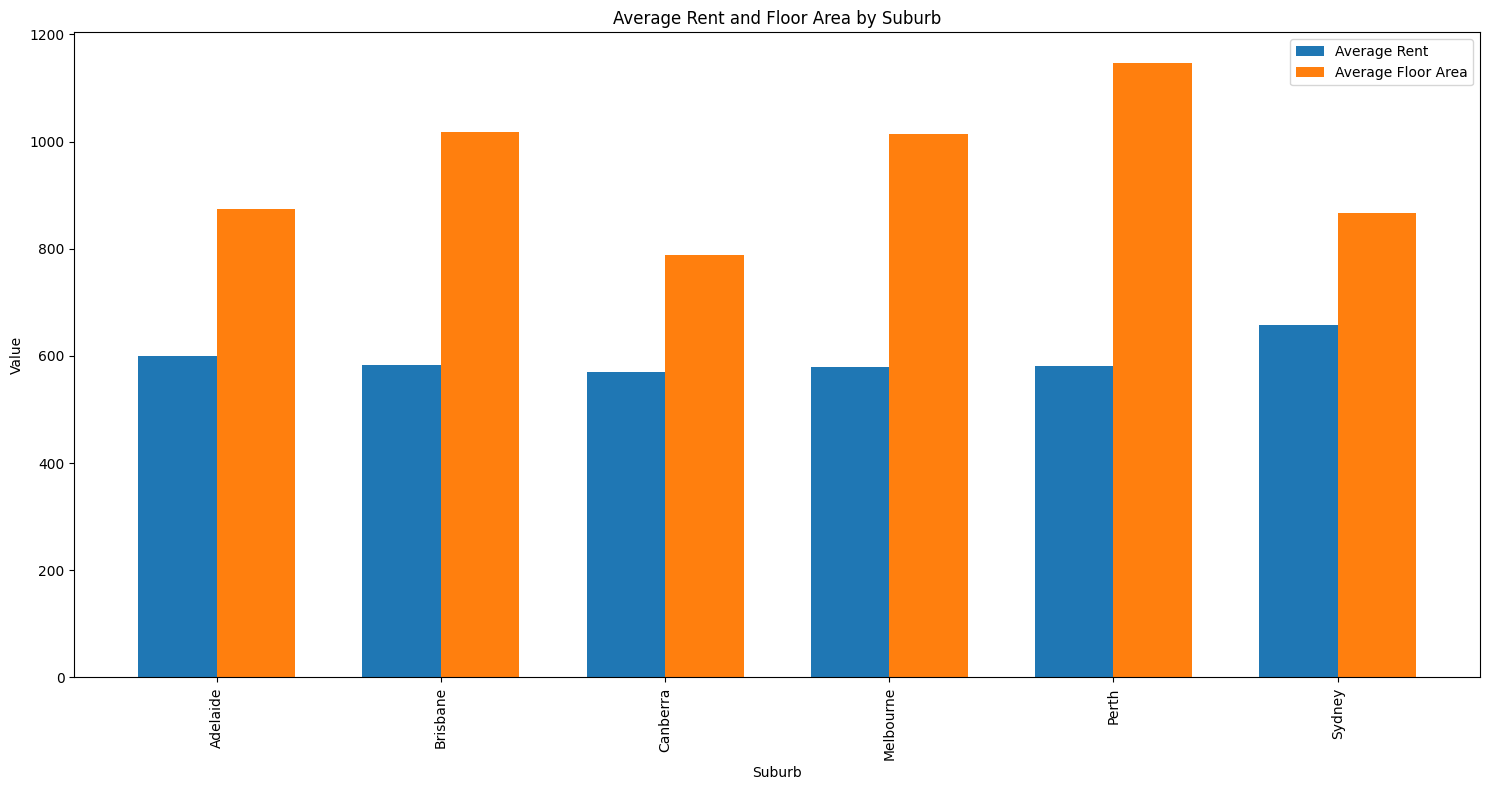

In [42]:
# prompt: area vs rent group different bargraph group by suburb

# Assuming your DataFrame is named 'df' and it has columns 'suburb', 'rent', 'floor_area'.

# Group by suburb and calculate the average rent and floor area for each suburb.
avg_rent_floor_area_by_suburb = df.groupby('suburb')[['rent', 'floor_area']].mean().reset_index()

# Create a grouped bar chart using matplotlib
import matplotlib.pyplot as plt

# Set the width of the bars
bar_width = 0.35

# Create the x-axis positions for the bars
x = range(len(avg_rent_floor_area_by_suburb))

# Create the figure and axes
fig, ax = plt.subplots(figsize=(15, 8))  # Adjust figure size as needed

# Plot the average rent bars
ax.bar([i - bar_width/2 for i in x], avg_rent_floor_area_by_suburb['rent'], width=bar_width, label='Average Rent')

# Plot the average floor area bars
ax.bar([i + bar_width/2 for i in x], avg_rent_floor_area_by_suburb['floor_area'], width=bar_width, label='Average Floor Area')

# Set the x-axis tick labels to suburb names
ax.set_xticks(x)
ax.set_xticklabels(avg_rent_floor_area_by_suburb['suburb'], rotation=90)  # Rotate labels for better readability

# Add labels and title
ax.set_xlabel('Suburb')
ax.set_ylabel('Value')
ax.set_title('Average Rent and Floor Area by Suburb')

# Add a legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [43]:
# prompt: number of bathroom vs rent divide it suburb wise

# Assuming your DataFrame is named 'df' and it has columns 'suburb', 'rent', 'number_of_bathrooms'.

# Group by suburb and number of bathrooms, then calculate the average rent.
avg_rent_by_suburb_bathrooms = df.groupby(['suburb', 'number_of_bathrooms'])['rent'].mean().reset_index()

# Create an Altair chart to show the average rent for different number of bathrooms in each suburb.
alt.Chart(avg_rent_by_suburb_bathrooms).mark_bar().encode(
    x='suburb:N',
    y='rent:Q',
    color='number_of_bathrooms:N',
    column='number_of_bathrooms:N'  # Use 'number_of_bathrooms' to create separate columns for comparison
).properties(
    title='Average Rent by Suburb and Number of Bathrooms'
)


alt.Chart(...)

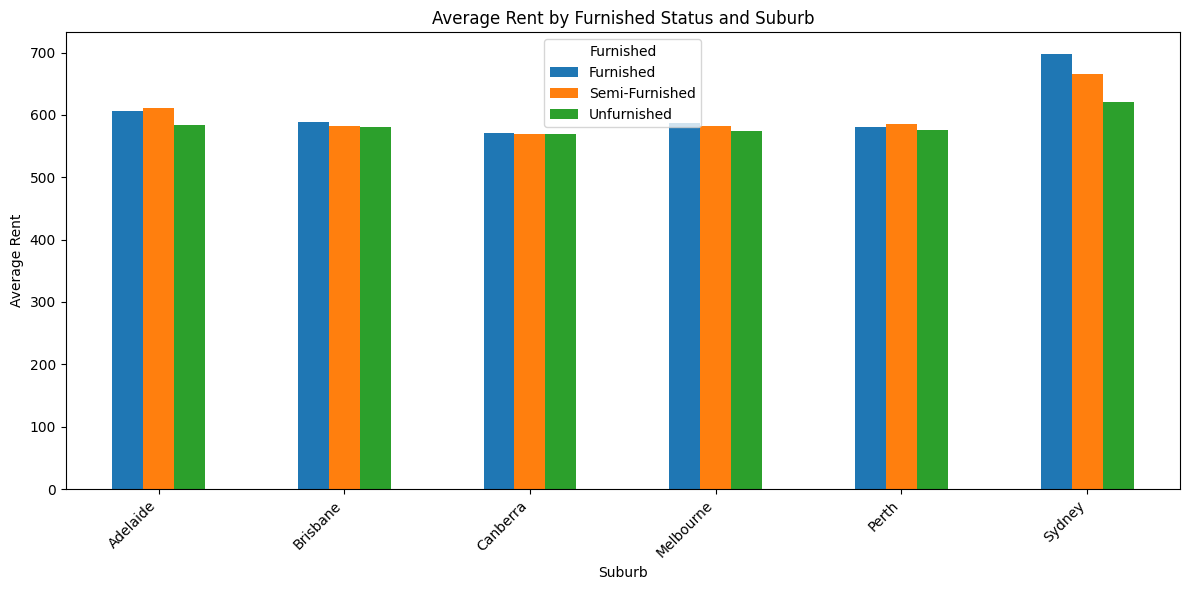

In [44]:
# Group by suburb and furnished, then calculate the mean rent
grouped = df.groupby(['suburb', 'furnished'])['rent'].mean().reset_index()

# Pivot the table so that each furnished status becomes a separate column
pivot_table = grouped.pivot(index='suburb', columns='furnished', values='rent')

# Create the grouped bar chart
pivot_table.plot(kind='bar', figsize=(12, 6))

plt.title("Average Rent by Furnished Status and Suburb")
plt.xlabel("Suburb")
plt.ylabel("Average Rent")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Furnished")
plt.tight_layout()
plt.show()

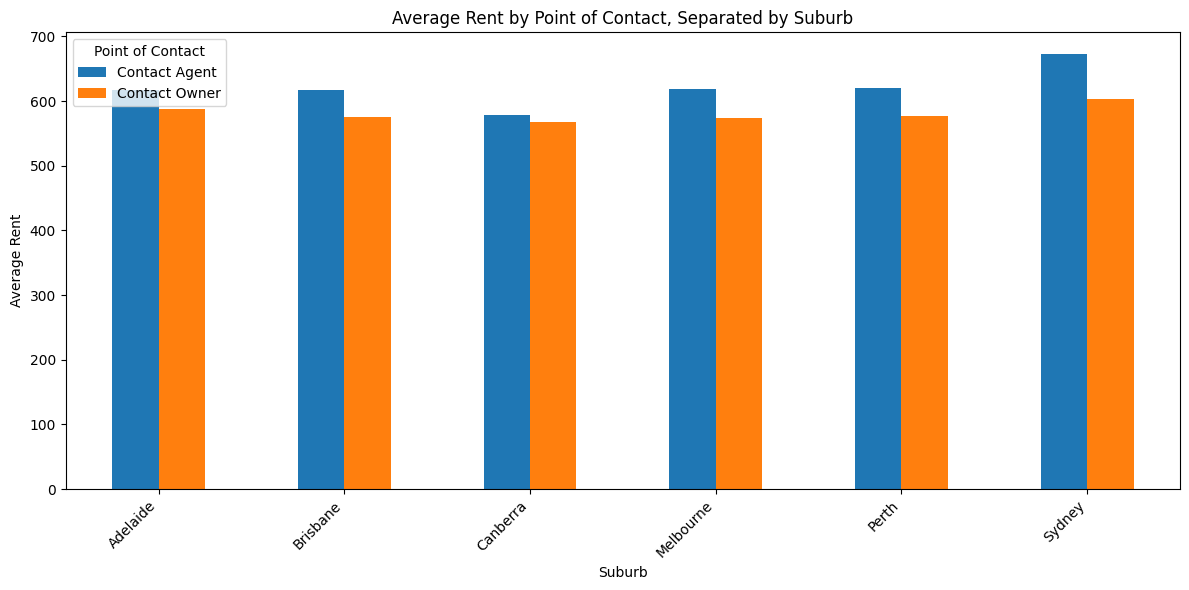

In [45]:
# Group the data by suburb and point_of_contact, then calculate the mean rent
grouped = df.groupby(['suburb', 'point_of_contact'])['rent'].mean().reset_index()

# Pivot the table so that each point_of_contact becomes a separate column, with suburb as the index
pivot_table = grouped.pivot(index='suburb', columns='point_of_contact', values='rent')

# Create the grouped bar chart
pivot_table.plot(kind='bar', figsize=(12, 6))

plt.title("Average Rent by Point of Contact, Separated by Suburb")
plt.xlabel("Suburb")
plt.ylabel("Average Rent")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Point of Contact")
plt.tight_layout()
plt.show()

In [46]:
# @title Validation Set Insights

wgt_eda_validation_set_insights = widgets.Textarea(
    value=None,
    placeholder='<student to fill this section>',
    description='Validation Set Insights:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_eda_validation_set_insights

Textarea(value='', description='Validation Set Insights:', layout=Layout(height='100%', width='auto'), placeho…

1️⃣ Advertisement Posting Trends
The number of advertisements posted per month shows a sharp increase in May and June, peaking in June.
July also maintains a high volume, indicating a seasonal trend where rental listings spike around mid-year.
April had the least postings, suggesting fewer rentals are available at that time.


2️⃣ Rent Trends Across Suburbs and Bedrooms
Average rent varies by the number of bedrooms and suburb.
Sydney and Perth have the highest rental prices across different bedroom counts, especially for 4-6 bedroom properties.
Adelaide, Brisbane, and Canberra show relatively stable and lower rental prices.
The biggest jump in rent occurs at 4+ bedrooms, indicating a high demand for larger properties in expensive cities.


3️⃣ Relationship Between Rent and Floor Area
Larger floor areas correspond with higher rental prices.
Perth, Brisbane, and Sydney show the highest combined rent and floor area values, indicating luxury or premium housing availability.
Canberra and Melbourne have smaller floor areas but remain competitive in rental pricing.


4️⃣ Rent Distribution by Number of Bathrooms
More bathrooms tend to increase rent, but not proportionally.
Properties with 4+ bathrooms have a sharp increase in rent, indicating premium or luxury housing.
1-2 bathroom properties have consistent pricing across suburbs, likely targeting average renters or small families.


5️⃣ Furnished vs. Unfurnished Rentals
Furnished apartments tend to be slightly more expensive than semi-furnished or unfurnished options.
The rent difference is minimal in most suburbs, meaning furniture availability does not drastically affect rent in some areas.
Sydney shows the largest rent gap, where furnished apartments demand a premium price.


6️⃣ Contact Preference and Rent
Properties listed by agents tend to have higher rents than those listed by owners.
This suggests:
Agents might represent higher-end properties.
Owner-listed properties are cheaper and possibly negotiable.
Brisbane, Sydney, and Melbourne show a notable price difference between agent-listed and owner-listed rentals.


7️⃣ Statistical Analysis of Key Variables
Number of bedrooms: Most rentals have 2-3 bedrooms (75% fall within this range).
Rent:
Minimum rent: $557 (affordable units available).
Maximum rent: $1,451 (luxury housing).
Median rent: $574, meaning most rentals are in this range.
Floor Area:
Huge variability: From 10 sq. ft. to 6,000 sq. ft..
Some very large properties drive up the average.
Number of bathrooms:
Most properties have 1-2 bathrooms.
A few luxury listings have up to 7 bathrooms.


Conclusions

✅ Sydney and Perth have the highest rents, especially for 4+ bedroom houses.

✅ Rent spikes with more bathrooms, but the increase is sharp at 4+ bathrooms.

✅ Furnished apartments have slightly higher rent, with Sydney showing the biggest premium.


✅ Properties listed by agents are generally more expensive than owner-listed ones.

✅ June is the peak rental listing month, while April has the lowest activity.

### C.4 Explore Testing Set

> You can add more cells in this section

In [47]:
df = testing_df.drop('street_suffix', axis=1)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1364 entries, 0 to 1363
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   advertised_date      1364 non-null   object 
 1   number_of_bedrooms   1364 non-null   int64  
 2   rent                 1364 non-null   float64
 3   floor_area           1364 non-null   int64  
 4   level                1364 non-null   object 
 5   suburb               1364 non-null   object 
 6   furnished            1364 non-null   object 
 7   tenancy_preference   1364 non-null   object 
 8   number_of_bathrooms  1364 non-null   int64  
 9   point_of_contact     1364 non-null   object 
 10  secondary_address    1364 non-null   object 
 11  building_number      1364 non-null   int64  
 12  street_name          1364 non-null   object 
 13  prefix               877 non-null    object 
 14  first_name           1364 non-null   object 
 15  last_name            1364 non-null   o

In [49]:
df.describe()

,number_of_bedrooms,rent,floor_area,number_of_bathrooms,building_number
count,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000
mean,2.184751,609.290323,1054.319648,2.098974,194.462610
std,0.845966,79.660648,691.094588,0.928729,290.294334
min,1.000000,557.000000,25.000000,1.000000,0.000000
25%,2.000000,571.000000,600.000000,1.000000,6.000000
50%,2.000000,581.000000,900.000000,2.000000,46.000000
75%,3.000000,613.000000,1300.000000,3.000000,274.500000
max,6.000000,1426.000000,7000.000000,7.000000,996.000000


In [50]:
df.columns

Index(['advertised_date', 'number_of_bedrooms', 'rent', 'floor_area', 'level',
       'suburb', 'furnished', 'tenancy_preference', 'number_of_bathrooms',
       'point_of_contact', 'secondary_address', 'building_number',
       'street_name', 'prefix', 'first_name', 'last_name', 'gender',
       'phone_number', 'email'],
      dtype='object')

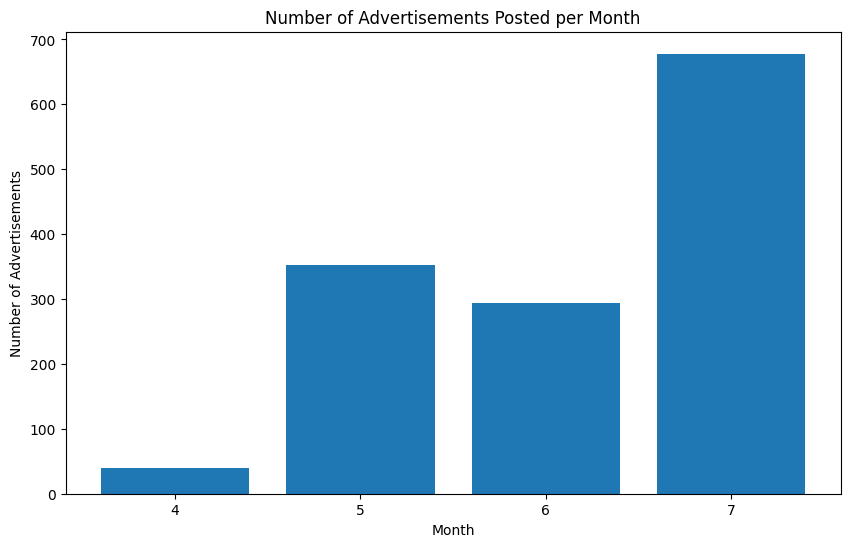

In [51]:
# prompt: convert 'advertised_date' into date and time, draw bargraph to find out the number of advertisement month wise

import pandas as pd
import matplotlib.pyplot as plt
# Assuming your DataFrame is named 'df' and it has a column 'advertised_date'.

# Convert 'advertised_date' to datetime objects
df['advertised_date'] = pd.to_datetime(df['advertised_date'])

# Extract the month from the 'advertised_date' column
df['month'] = df['advertised_date'].dt.month

# Group by month and count the number of advertisements in each month
monthly_counts = df.groupby('month')['advertised_date'].count()

# Create a bar chart visualization
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.bar(monthly_counts.index, monthly_counts.values)
plt.xlabel('Month')
plt.ylabel('Number of Advertisements')
plt.title('Number of Advertisements Posted per Month')
plt.xticks(monthly_counts.index)  # Ensure x-axis ticks show all months
plt.show()


In [52]:
# prompt: barraph of 'number_of_bedrooms' vs 'rent' separate by 'suburb'

# Assuming your DataFrame is named 'df' and it has columns 'suburb', 'rent', 'number_of_bedrooms'.

# Group by suburb and number of bedrooms, then calculate the average rent.
avg_rent_by_suburb_bedrooms = df.groupby(['suburb', 'number_of_bedrooms'])['rent'].mean().reset_index()

# Create an Altair chart to show the average rent for different number of bedrooms in each suburb.
alt.Chart(avg_rent_by_suburb_bedrooms).mark_bar().encode(
    x='suburb:N',
    y='rent:Q',
    color='number_of_bedrooms:N',
    column='number_of_bedrooms:N'  # Use 'number_of_bedrooms' to create separate columns for comparison
).properties(
    title='Average Rent by Suburb and Number of Bedrooms'
)


alt.Chart(...)

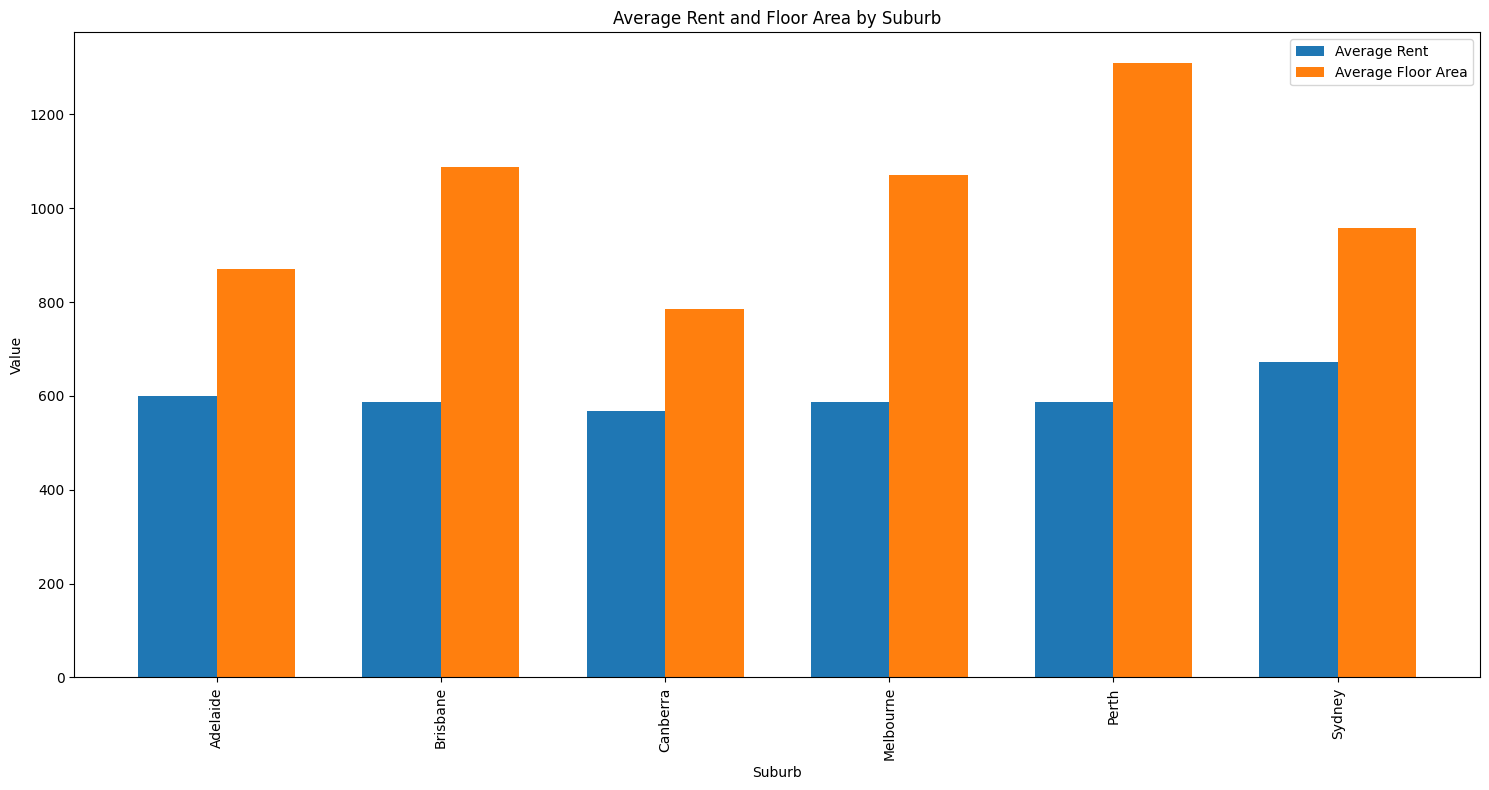

In [53]:
# prompt: barraph of 'floor_area' vs 'rent' separate by 'suburb'

import matplotlib.pyplot as plt
# Assuming your DataFrame is named 'df' and it has columns 'suburb', 'rent', 'floor_area'.

# Group by suburb and calculate the average rent and floor area for each suburb.
avg_rent_floor_area_by_suburb = df.groupby('suburb')[['rent', 'floor_area']].mean().reset_index()

# Create a grouped bar chart using matplotlib

# Set the width of the bars
bar_width = 0.35

# Create the x-axis positions for the bars
x = range(len(avg_rent_floor_area_by_suburb))

# Create the figure and axes
fig, ax = plt.subplots(figsize=(15, 8))  # Adjust figure size as needed

# Plot the average rent bars
ax.bar([i - bar_width/2 for i in x], avg_rent_floor_area_by_suburb['rent'], width=bar_width, label='Average Rent')

# Plot the average floor area bars
ax.bar([i + bar_width/2 for i in x], avg_rent_floor_area_by_suburb['floor_area'], width=bar_width, label='Average Floor Area')

# Set the x-axis tick labels to suburb names
ax.set_xticks(x)
ax.set_xticklabels(avg_rent_floor_area_by_suburb['suburb'], rotation=90)  # Rotate labels for better readability

# Add labels and title
ax.set_xlabel('Suburb')
ax.set_ylabel('Value')
ax.set_title('Average Rent and Floor Area by Suburb')

# Add a legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


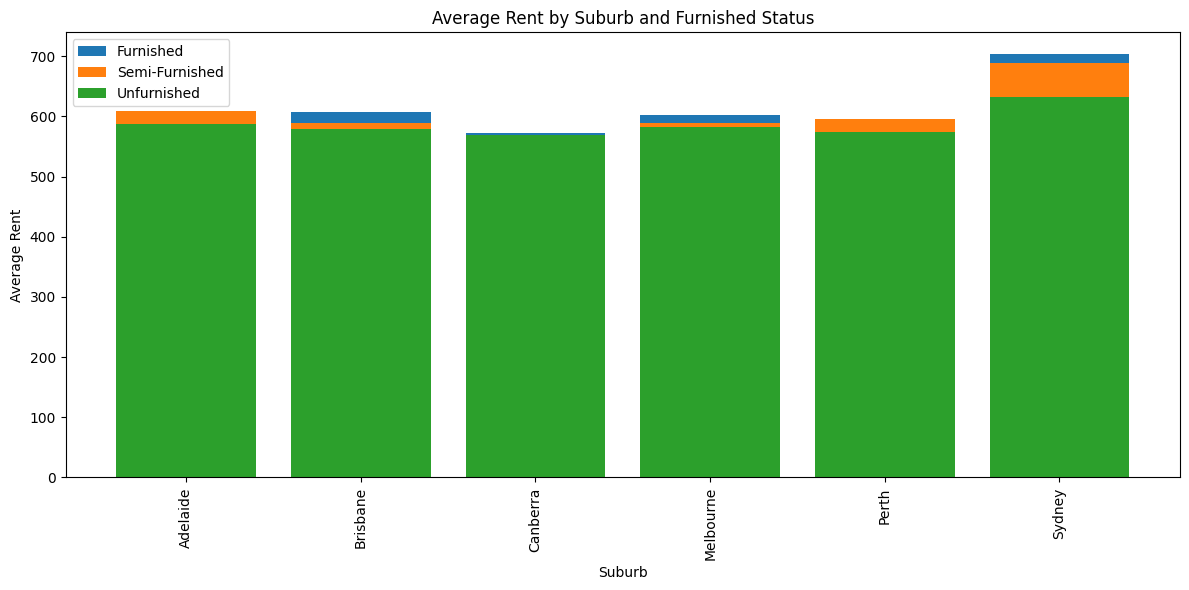

In [54]:
# prompt: barraph of 'furnished' vs 'rent' separate by 'suburb'

import matplotlib.pyplot as plt
# Assuming your DataFrame is named 'df' and it has columns 'suburb', 'rent', 'furnished'.

# Group the data by suburb and furnished status, then calculate the average rent.
avg_rent_by_suburb_furnished = df.groupby(['suburb', 'furnished'])['rent'].mean().reset_index()

# Create a bar chart using matplotlib to visualize the average rent for furnished and unfurnished properties in each suburb.

# Create the figure and axes
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

# Create a bar plot with different colors for furnished and unfurnished
for furnished_status in avg_rent_by_suburb_furnished['furnished'].unique():
  subset = avg_rent_by_suburb_furnished[avg_rent_by_suburb_furnished['furnished'] == furnished_status]
  plt.bar(subset['suburb'], subset['rent'], label=furnished_status)

# Add labels and title
plt.xlabel('Suburb')
plt.ylabel('Average Rent')
plt.title('Average Rent by Suburb and Furnished Status')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


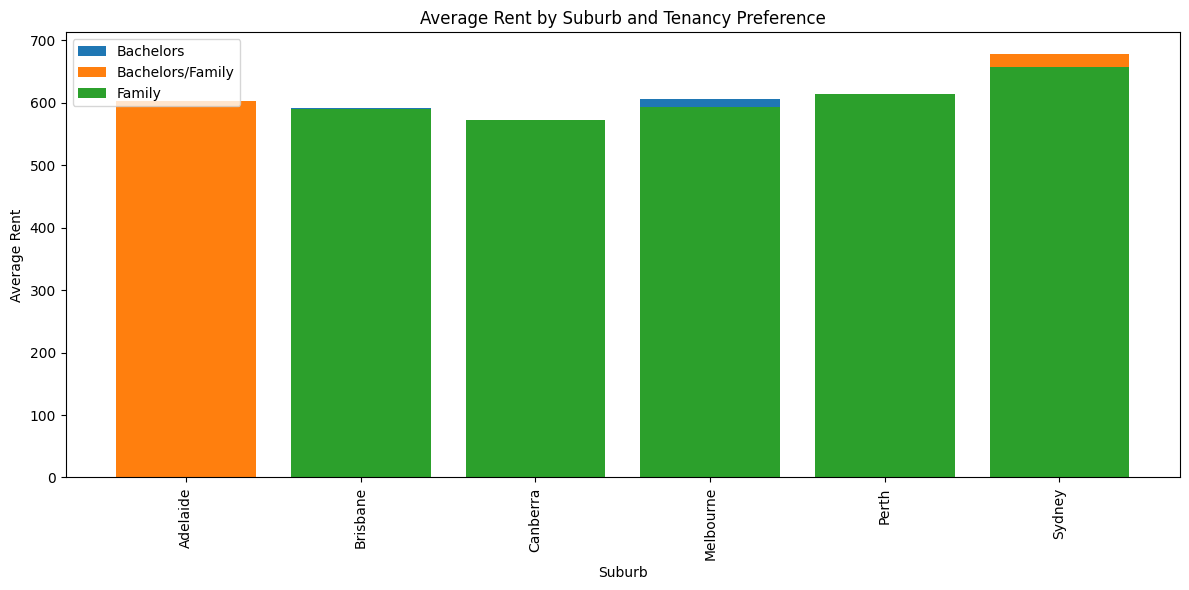

In [55]:
# prompt: barraph of 'tenancy_preference' vs 'rent' separate by 'suburb'

import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df' and it has columns 'suburb', 'rent', 'tenancy_preference'.

# Group by suburb and tenancy preference, then calculate the average rent.
avg_rent_by_suburb_tenancy = df.groupby(['suburb', 'tenancy_preference'])['rent'].mean().reset_index()

# Create a bar chart using matplotlib to visualize the average rent for different tenancy preferences in each suburb.

# Create the figure and axes
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

# Create a bar plot with different colors for each tenancy preference
for tenancy_pref in avg_rent_by_suburb_tenancy['tenancy_preference'].unique():
  subset = avg_rent_by_suburb_tenancy[avg_rent_by_suburb_tenancy['tenancy_preference'] == tenancy_pref]
  plt.bar(subset['suburb'], subset['rent'], label=tenancy_pref)

# Add labels and title
plt.xlabel('Suburb')
plt.ylabel('Average Rent')
plt.title('Average Rent by Suburb and Tenancy Preference')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [56]:
# prompt: barraph of 'number_of_bathrooms' vs 'rent' separate by 'suburb'

# Assuming your DataFrame is named 'df' and it has columns 'suburb', 'rent', 'number_of_bathrooms'.

# Group by suburb and number of bathrooms, then calculate the average rent.
avg_rent_by_suburb_bathrooms = df.groupby(['suburb', 'number_of_bathrooms'])['rent'].mean().reset_index()

# Create an Altair chart to show the average rent for different number of bathrooms in each suburb.
alt.Chart(avg_rent_by_suburb_bathrooms).mark_bar().encode(
    x='suburb:N',
    y='rent:Q',
    color='number_of_bathrooms:N',
    column='number_of_bathrooms:N'  # Use 'number_of_bathrooms' to create separate columns for comparison
).properties(
    title='Average Rent by Suburb and Number of Bathrooms'
)


alt.Chart(...)

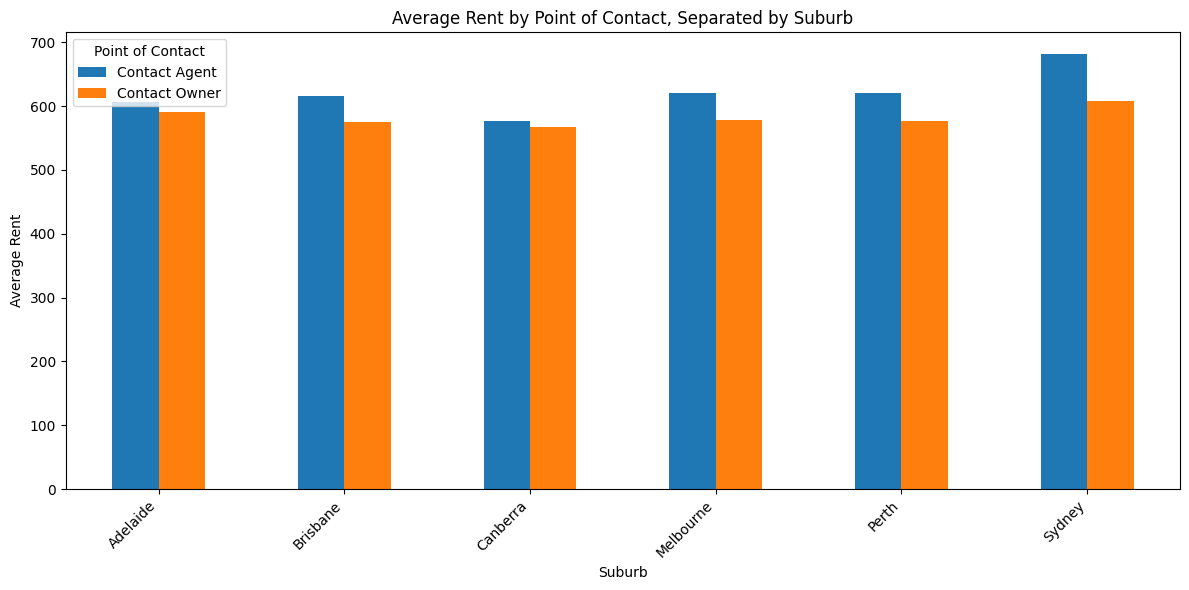

In [57]:
# prompt: barraph of 'point_of_contact' vs 'rent' separate by 'suburb'

import matplotlib.pyplot as plt
# Group the data by suburb and point_of_contact, then calculate the mean rent
grouped = df.groupby(['suburb', 'point_of_contact'])['rent'].mean().reset_index()

# Pivot the table so that each point_of_contact becomes a separate column, with suburb as the index
pivot_table = grouped.pivot(index='suburb', columns='point_of_contact', values='rent')

# Create the grouped bar chart
pivot_table.plot(kind='bar', figsize=(12, 6))

plt.title("Average Rent by Point of Contact, Separated by Suburb")
plt.xlabel("Suburb")
plt.ylabel("Average Rent")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Point of Contact")
plt.tight_layout()
plt.show()


In [58]:
# @title Testing Set Insights

wgt_eda_testing_set_insights = widgets.Textarea(
    value=None,
    placeholder='<student to fill this section>',
    description='Testing Set Insights:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_eda_testing_set_insights

Textarea(value='', description='Testing Set Insights:', layout=Layout(height='100%', width='auto'), placeholde…

1️⃣ Advertisement Posting Trends
The number of advertisements per month follows a similar trend to the validation dataset.
July had the highest number of advertisements, indicating a peak rental season.
April had the lowest number of advertisements, showing fewer listings in early months.
May and June show a steady increase, highlighting a mid-year rental boom.


2️⃣ Rent Trends Across Suburbs and Bedrooms
The average rent increases with more bedrooms.
Sydney and Perth have the highest rental prices across different bedroom counts, especially for 4+ bedroom properties.
Adelaide and Canberra have more affordable rental options, with lower price variations between 1-3 bedrooms.
5-6 bedroom properties show a significant jump in rent, indicating that luxury or high-end properties dominate this category.


3️⃣ Relationship Between Rent and Floor Area
Larger floor areas correlate with higher rent, as expected.
Perth, Brisbane, and Sydney have the highest combined rent and floor area values, suggesting that these cities have larger rental properties.
Canberra and Melbourne offer smaller floor areas but at competitive prices, indicating that space efficiency is a factor in pricing.


4️⃣ Rent Distribution by Number of Bathrooms
Properties with 1-2 bathrooms dominate the market, covering most listings.
4+ bathrooms significantly increase rental prices, indicating luxury housing segments.
Sydney and Perth show the highest rent for properties with 5+ bathrooms, reinforcing their premium rental market status.


5️⃣ Furnished vs. Unfurnished Rentals
Furnished apartments tend to have slightly higher rent, but the difference is not substantial in some suburbs.
Sydney and Perth show the highest premium for furnished properties, indicating higher demand.
Most suburbs have a minimal rent gap between furnished and unfurnished properties, making furnishing a less decisive factor for rent pricing.


6️⃣ Tenancy Preference and Rent
Family-preferred rentals generally have higher rents, suggesting that family-oriented properties are more spacious and in demand.
Bachelors and mixed tenancy listings have moderate pricing, making them more accessible for smaller groups or individuals.
Sydney and Perth have the highest variance in rental pricing based on tenancy preference.


7️⃣ Contact Preference and Rent
Agent-listed properties generally have higher rents than owner-listed properties.
Brisbane, Sydney, and Melbourne show the biggest price gap between agent and owner-listed properties.
Owner-listed properties may be negotiable and more budget-friendly, whereas agents handle premium or structured rentals.


8️⃣ Statistical Analysis of Key Variables
Number of bedrooms: Most rentals have 2-3 bedrooms, aligning with market demand.
Rent:
Minimum rent: $557, showing affordability in certain areas.
Maximum rent: $1,426, indicating luxury property availability.
Median rent: $581, slightly higher than the validation dataset.
Floor Area:
Huge variability: Ranges from 25 sq. ft. to 7,000 sq. ft..
Some extreme values drive up the mean, suggesting the presence of luxury rentals.
Number of bathrooms:
Most properties have 1-2 bathrooms, covering the general market.
Few high-end properties with 6-7 bathrooms significantly increase rent.


Conclusions

✅ July is the peak rental listing month, while April has the lowest activity.

✅ Sydney and Perth have the highest rents, especially for 4+ bedroom properties.

✅ Larger floor areas and more bathrooms significantly increase rent, with luxury properties dominating high-end categories.

✅ Furnished apartments are more expensive in Sydney and Perth, but the impact is minimal in other cities.

✅ Family-oriented rentals tend to have higher prices, especially in Sydney and Perth.

✅ Agent-listed properties are generally more expensive, likely representing premium or structured rentals.

### C.5 Explore Target Variable

> Save the name of column used as the target variable and call it `target_name`

> You can add more cells in this section

In [59]:
# Define the target variable
target_name = 'rent'

# Display basic statistics of the target variable
training_df[target_name].describe()

,rent
count,3434.000000
mean,595.080664
std,105.380805
min,557.000000
25%,567.000000
50%,574.000000
75%,590.000000
max,5037.000000


In [60]:
# @title Target Variable Insights

wgt_eda_target_variable_insights = widgets.Textarea(
    value=None,
    placeholder='<student to fill this section>',
    description='Target Variable Insights:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_eda_target_variable_insights

Textarea(value='', description='Target Variable Insights:', layout=Layout(height='100%', width='auto'), placeh…

Based on the descriptive statistics for the target variable rent, here are some key insights:

Sample Size:
With 3434 observations, the dataset is robust enough to draw meaningful conclusions.

Central Tendency:

The median rent is 574, with the 25th and 75th percentiles being 567 and 590, respectively.
This indicates that for most properties, the rent is tightly clustered within a relatively narrow range.
Mean vs. Median:

The mean rent is 595, which is slightly higher than the median.
This difference suggests that the distribution is right-skewed, where a few higher values are pulling the mean upward.
Variability and Outliers:

The standard deviation is about 105, which is moderate given the central values.
However, the maximum value is 5037—significantly higher than the rest of the data.
This large maximum likely represents one or a few premium rental properties that are outliers compared to the majority.
Implications for Modeling:

The skewness and the presence of extreme values (outliers) suggest that you might benefit from transforming the target variable (for example, using a logarithmic transformation) to stabilize variance and reduce the influence of outliers on your model.
In summary, while most rental prices are concentrated around a narrow range, the high maximum value indicates the presence of outliers. This skewed distribution should be taken into account during the modeling process to ensure robust predictions.

### C.6 Explore Feature of Interest

> You can add more cells in this section

suburb Unique Values: 6
suburb
Brisbane     694
Melbourne    632
Sydney       607
Perth        595
Adelaide     468
Name: count, dtype: int64 

furnished Unique Values: 3
furnished
Semi-Furnished    1587
Unfurnished       1370
Furnished          477
Name: count, dtype: int64 

tenancy_preference Unique Values: 3
tenancy_preference
Bachelors/Family    2579
Bachelors            565
Family               290
Name: count, dtype: int64 

level Unique Values: 334
level
1 out of 2         289
Ground out of 2    272
2 out of 3         261
1 out of 3         239
2 out of 4         237
Name: count, dtype: int64 



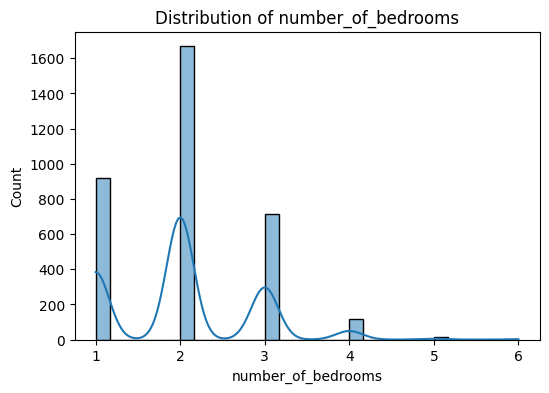

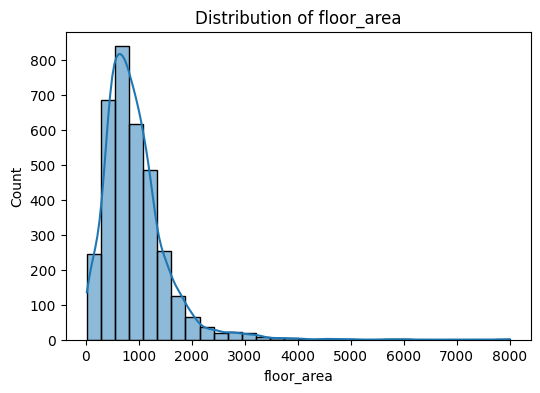

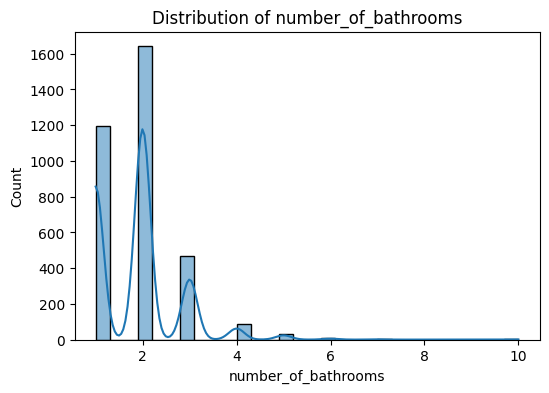

In [61]:
# Inspect unique values in categorical features
categorical_features = ['suburb', 'furnished', 'tenancy_preference', 'level']
for feature in categorical_features:
    print(f"{feature} Unique Values: {training_df[feature].nunique()}")
    print(training_df[feature].value_counts().head(), "\n")

# Visualize distribution of numerical features
import seaborn as sns
import matplotlib.pyplot as plt

numerical_features = ['number_of_bedrooms', 'floor_area', 'number_of_bathrooms']
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(training_df[feature], bins=30, kde=True)
    plt.title(f"Distribution of {feature}")
    plt.show()

                     number_of_bedrooms  floor_area  number_of_bathrooms  \
number_of_bedrooms             1.000000    0.694859             0.773417   
floor_area                     0.694859    1.000000             0.731628   
number_of_bathrooms            0.773417    0.731628             1.000000   
rent                           0.319498    0.384575             0.387854   

                         rent  
number_of_bedrooms   0.319498  
floor_area           0.384575  
number_of_bathrooms  0.387854  
rent                 1.000000  


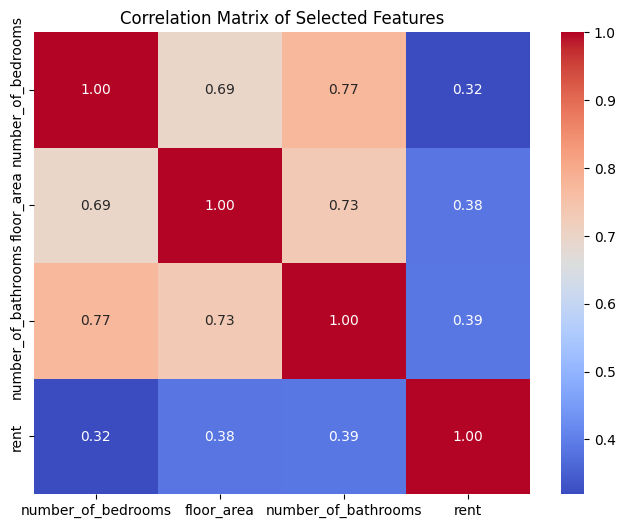

In [62]:
# prompt: now create a correlation matrix among the selected features for the training data

import matplotlib.pyplot as plt
# Select features for correlation analysis
selected_features = ['number_of_bedrooms', 'floor_area', 'number_of_bathrooms', 'rent']

# Create a correlation matrix for the selected features
correlation_matrix = training_df[selected_features].corr()

# Display the correlation matrix
print(correlation_matrix)

# Optionally, visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Selected Features')
plt.show()


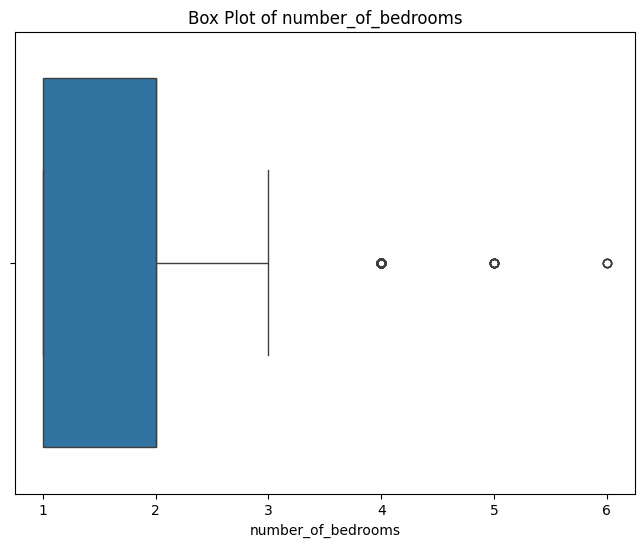

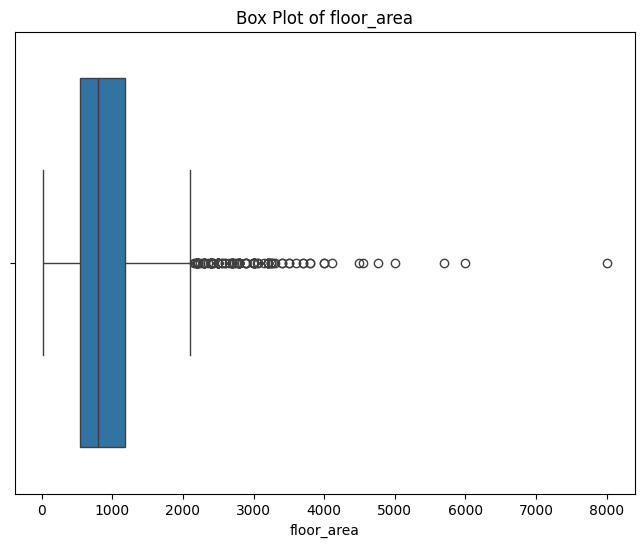

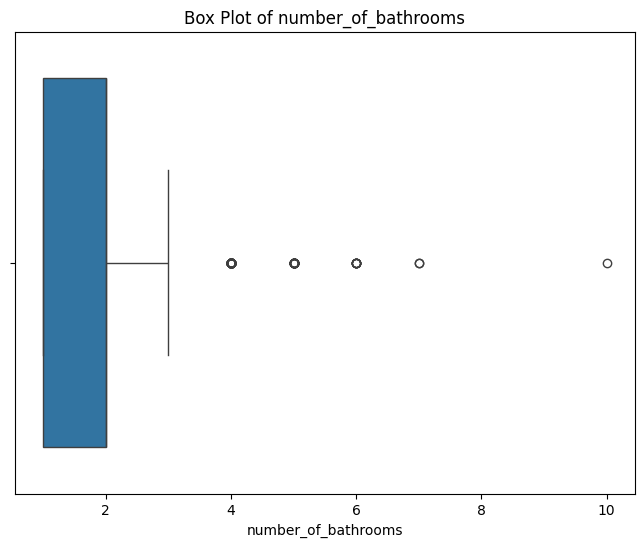

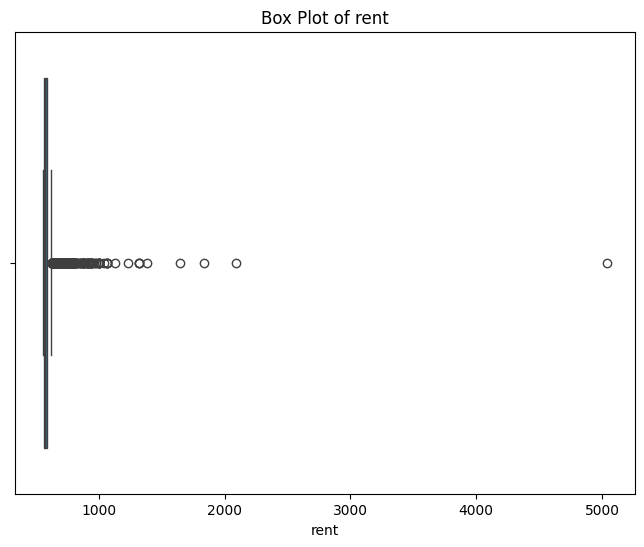

In [63]:
# prompt: now create a boxplot to see the outliers for the selected features for the training data

import matplotlib.pyplot as plt
# Assuming your training data is in a DataFrame named 'training_df'
# and you have a list of selected features named 'selected_features'.

# Create a box plot for each selected feature
for feature in selected_features:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=training_df[feature])
  plt.title(f'Box Plot of {feature}')
  plt.show()


                     number_of_bedrooms  floor_area  number_of_bathrooms  \
number_of_bedrooms             1.000000    0.758677             0.828351   
floor_area                     0.758677    1.000000             0.759565   
number_of_bathrooms            0.828351    0.759565             1.000000   
rent                           0.513178    0.522304             0.606718   

                         rent  
number_of_bedrooms   0.513178  
floor_area           0.522304  
number_of_bathrooms  0.606718  
rent                 1.000000  


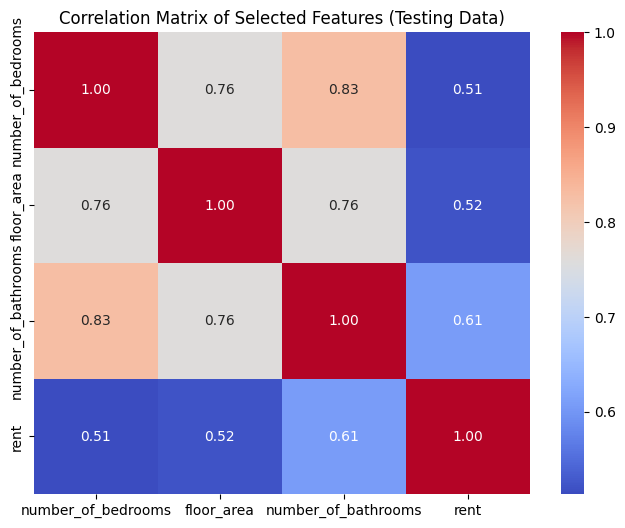

In [64]:
# prompt: now create a correlation matrix among the selected features for the testing data

import matplotlib.pyplot as plt
# Select features for correlation analysis in the testing data
selected_features = ['number_of_bedrooms', 'floor_area', 'number_of_bathrooms', 'rent']

# Create a correlation matrix for the selected features in the testing data
correlation_matrix_test = df[selected_features].corr()

# Display the correlation matrix for the testing data
print(correlation_matrix_test)

# Optionally, visualize the correlation matrix using a heatmap for the testing data
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_test, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Selected Features (Testing Data)')
plt.show()


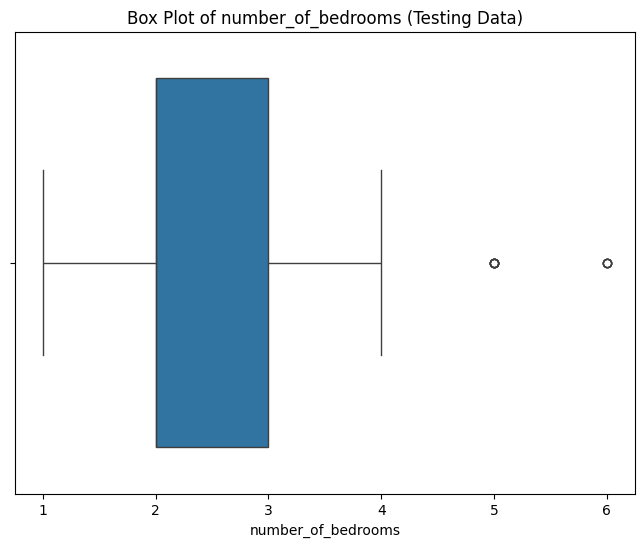

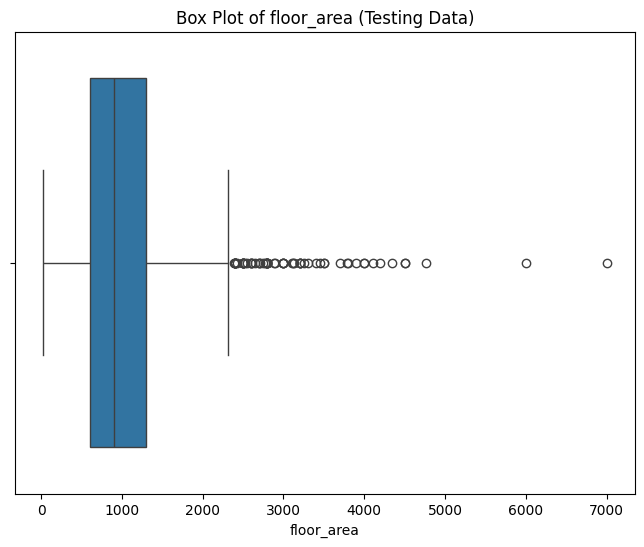

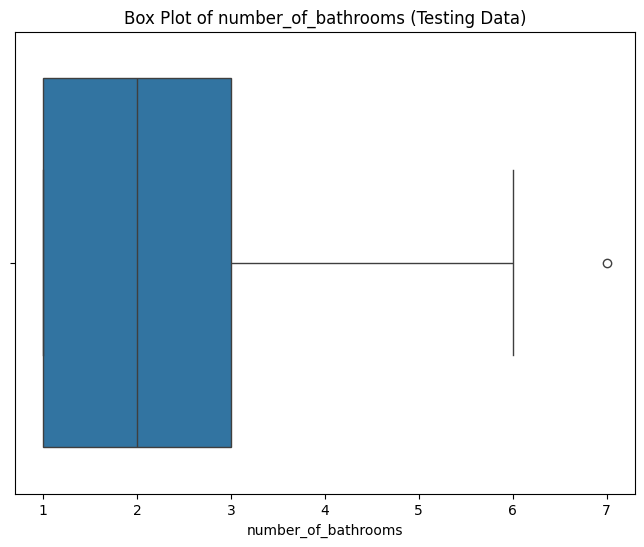

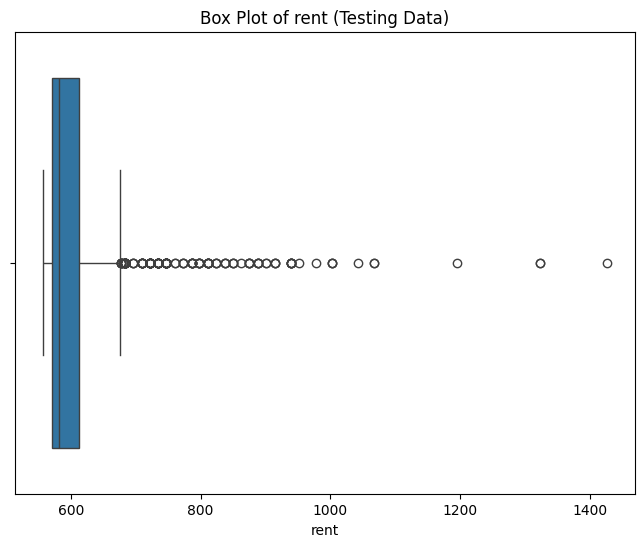

In [65]:
# prompt: now create a boxplot to see the outliers for the selected features for the testing data

import matplotlib.pyplot as plt
# Assuming your testing data is in a DataFrame named 'df'
# and you have a list of selected features named 'selected_features'.

# Create a box plot for each selected feature in the testing data
for feature in selected_features:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=df[feature])
  plt.title(f'Box Plot of {feature} (Testing Data)')
  plt.show()


                     number_of_bedrooms  floor_area  number_of_bathrooms  \
number_of_bedrooms             1.000000    0.758677             0.828351   
floor_area                     0.758677    1.000000             0.759565   
number_of_bathrooms            0.828351    0.759565             1.000000   
rent                           0.513178    0.522304             0.606718   

                         rent  
number_of_bedrooms   0.513178  
floor_area           0.522304  
number_of_bathrooms  0.606718  
rent                 1.000000  


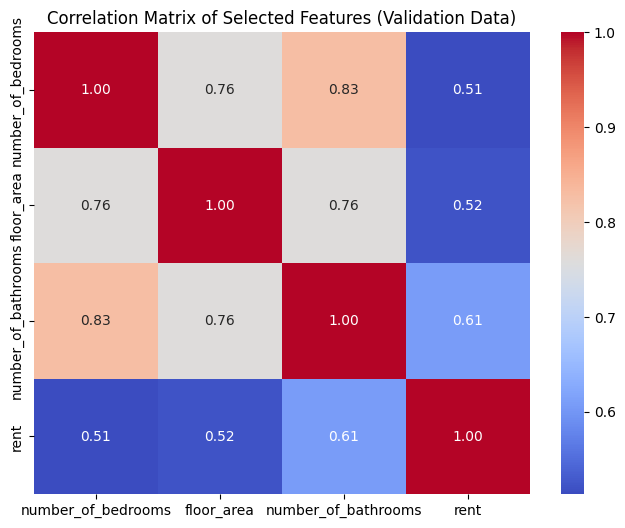

In [66]:
# prompt: now create a correlation matrix among the selected features for the validation data

import matplotlib.pyplot as plt
# Select features for correlation analysis in the validation data
selected_features = ['number_of_bedrooms', 'floor_area', 'number_of_bathrooms', 'rent']

# Create a correlation matrix for the selected features in the validation data
correlation_matrix_validation = df[selected_features].corr()

# Display the correlation matrix for the validation data
print(correlation_matrix_validation)

# Optionally, visualize the correlation matrix using a heatmap for the validation data
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_validation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Selected Features (Validation Data)')
plt.show()


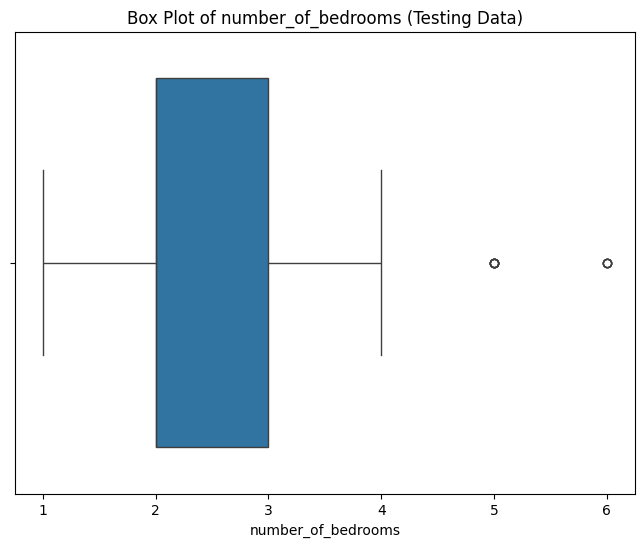

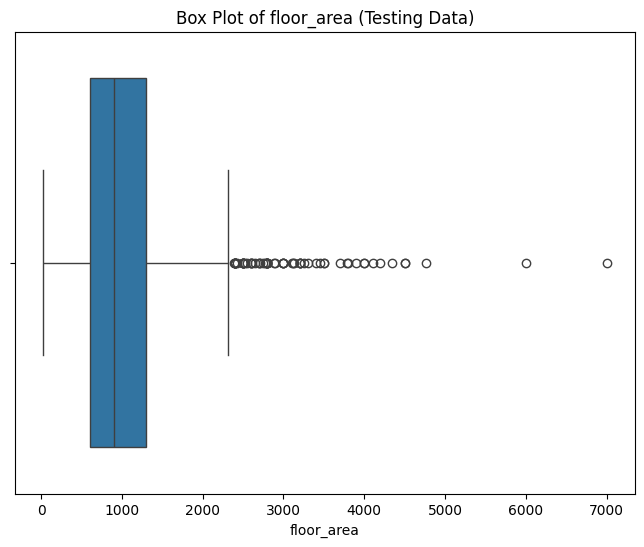

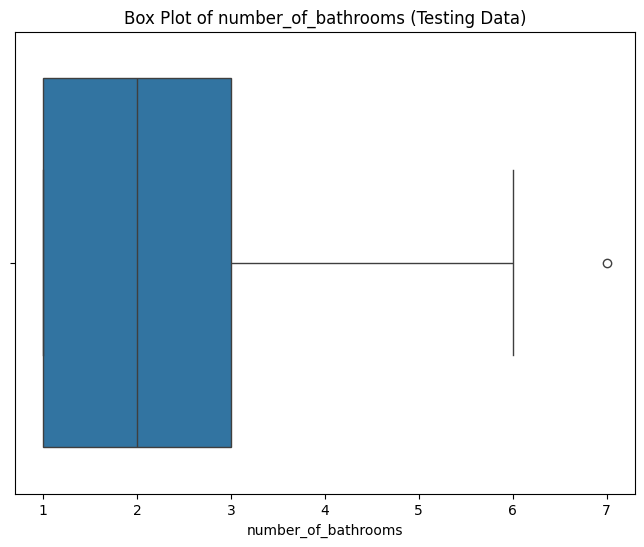

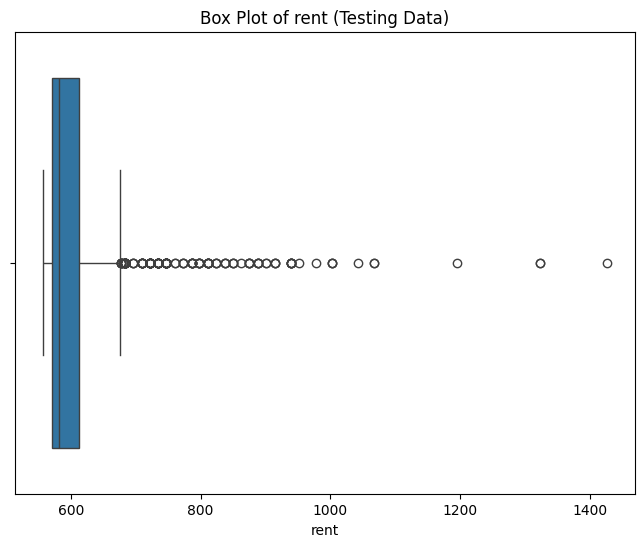

In [67]:
# prompt: now create a boxplot to see the outliers for the selected features for the testing data

import matplotlib.pyplot as plt
# Assuming your testing data is in a DataFrame named 'df'
# and you have a list of selected features named 'selected_features'.

# Create a box plot for each selected feature in the testing data
for feature in selected_features:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=df[feature])
  plt.title(f'Box Plot of {feature} (Testing Data)')
  plt.show()


In [68]:
# @title Feature Insights

wgt_eda_feature_insights = widgets.Textarea(
    value=None,
    placeholder='<student to fill this section>',
    description='Feature Insights:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_eda_feature_insights

Textarea(value='', description='Feature Insights:', layout=Layout(height='100%', width='auto'), placeholder='<…

In [69]:
training_df['furnished'].head()

,furnished
0,Unfurnished
1,Semi-Furnished
2,Semi-Furnished
3,Unfurnished
4,Unfurnished


# 1. Correlation Analysis
## **Training Data**

**Feature Interrelationships:**
Structural features are tightly linked to one another but only partially explain rent, implying other factors (location, furnishing, etc.) are also influential.

## **Validation Data**
Property size/configuration has a stronger relationship with rent in the validation set compared to the training set. This could reflect differences in how properties are distributed in the validation subset (e.g., fewer extreme outliers or more uniform coverage of property types).

## **Testing Data**

 Structural features are similarly interdependent in the testing set, and the influence on rent is somewhat higher than in the training set. This suggests the testing set might include properties where bathrooms, bedrooms, and floor area more directly drive rent, or it could reflect fewer extreme outliers in other variables.

 # 2. Distribution and Outliers
 ## Number of Bedrooms
Typical Range & Occasional Outliers:
Most properties have 1–3 bedrooms; outliers at 5–6 bedrooms indicate larger properties.
Boxplot Insight: Heavy clustering around 2–3 bedrooms suggests these are the most common configurations.

## Floor Area
Skewness & Large Outliers:
Distribution is right-skewed, with a substantial portion in the ~500–1500 range (depending on units).
Outliers extend up to 7000+, indicating very large or luxury properties.
Modeling Note: A log transform or robust approach can mitigate the influence of these high-value outliers.

## Number of Bathrooms
Concentration & Rare Extremes:
Most properties have 1–2 bathrooms; 3 is somewhat common, and values above 4–5 are quite rare.
Boxplot Insight: A few properties have very high bathroom counts (e.g., 7–10), potentially luxury or custom homes.

## Rent
High-End Outliers & Skewness:
Training data shows rent primarily clustered around 550–600 but extends up to 5037, indicating a few extremely expensive properties.
Testing data boxplots show fewer ultra-high rents, peaking around 1400.
Interpretation: Such distributional differences can affect how well the model generalizes if it has seen extremely high-rent properties during training but not in testing.

# 3. Overall Observations & Modeling Considerations

## Interdependence of Structural Features:

Bedrooms, bathrooms, and floor area have strong correlations among themselves, suggesting they measure related aspects of property size and capacity.

## Moderate to Strong Correlation with Rent (Especially in Validation & Testing):

In both the validation and testing data, bathrooms, bedrooms, and floor area correlate more strongly with rent (0.51–0.61) than in training (0.32–0.39). This discrepancy might be due to distribution differences or outliers in the training set.

## Importance of Non-Structural Variables:

Even though structural features correlate with rent, other features—such as location (suburb), furnishing status, or tenancy preference—could explain additional variance.

## Outlier Treatment:

Floor area, number of bathrooms, and rent each contain outliers. Log transformations or robust scaling may be necessary to reduce skewness and improve model stability.

## Data Split Differences:

The training, validation, and testing sets may not have identical distributions. High-rent outliers are prominent in the training set but less so in the testing set, which can lead to discrepancies in model performance if not addressed.


---
## D. Feature Selection


### D.1 Approach 1

In [70]:
# Approach 1: Linear Regression with raw features
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Selecting numerical features
features_list = ['number_of_bedrooms', 'floor_area', 'number_of_bathrooms']
X = training_df[features_list]
y = training_df[target_name]

# Splitting into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model1 = LinearRegression()
model1.fit(X_train, y_train)

# Make predictions
y_pred = model1.predict(X_val)

# Evaluate performance
mae = mean_absolute_error(y_val, y_pred)
print(f"Approach 1 - Linear Regression MAE: {mae}")


Approach 1 - Linear Regression MAE: 30.25507797466227


In [71]:
# @title Feature Selection 1 Insights

wgt_feat_selection_1_insights = widgets.Textarea(
    value=None,
    placeholder='<student to fill this section>',
    description='Feature Selection 1:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_feat_selection_1_insights

Textarea(value='', description='Feature Selection 1:', layout=Layout(height='100%', width='auto'), placeholder…

In Approach 1, you used a simple Linear Regression model with only the raw numerical features: number_of_bedrooms, floor_area, and number_of_bathrooms. The model achieved an MAE of approximately 30.26. This result suggests that, while these core features capture essential aspects of a property’s size and capacity, their linear combination may not fully capture the complex and potentially non-linear relationships influencing rental prices. The relatively higher error indicates that relying solely on these features might leave important variability unexplained, pointing toward the need for additional features or transformations to better model the underlying patterns.

### D.2 Approach 2

In [72]:
# Approach 2: Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

# Train a Decision Tree model
model2 = DecisionTreeRegressor(max_depth=5, random_state=42)
model2.fit(X_train, y_train)

# Make predictions
y_pred_tree = model2.predict(X_val)

# Evaluate performance
mae_tree = mean_absolute_error(y_val, y_pred_tree)
print(f"Approach 2 - Decision Tree Regression MAE: {mae_tree}")

Approach 2 - Decision Tree Regression MAE: 20.64758806974769


In [73]:
# @title Feature Selection 2 Insights

wgt_feat_selection_2_insights = widgets.Textarea(
    value=None,
    placeholder='<student to fill this section>',
    description='Feature Selection 2:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_feat_selection_2_insights

Textarea(value='', description='Feature Selection 2:', layout=Layout(height='100%', width='auto'), placeholder…

Approach 2 employs a Decision Tree Regression model (with a maximum depth of 5) using the same set of numerical features. This method achieved a lower MAE of around 20.65, suggesting that the decision tree is more adept at capturing the non-linear relationships and interactions between these features. The improvement in performance over the linear approach indicates that the influence of features such as the number of bedrooms, floor area, and number of bathrooms on rent may be inherently non-linear. This result motivates further exploration of non-linear models and more complex feature interactions to better predict rental prices.

## D.3 Final Selection of Features

> Save the names of selected features into a list called `features_list`

In [74]:
# Define the final selected features
features_list = [
    'number_of_bedrooms', 'floor_area', 'number_of_bathrooms',
    'furnished','rent','suburb'
]

print(f"Final Selected Features: {features_list}")

Final Selected Features: ['number_of_bedrooms', 'floor_area', 'number_of_bathrooms', 'furnished', 'rent', 'suburb']


In [75]:
training_df['furnished'].head()

,furnished
0,Unfurnished
1,Semi-Furnished
2,Semi-Furnished
3,Unfurnished
4,Unfurnished


In [76]:
# @title Feature Selection Explanation

wgt_feat_selection_explanation = widgets.Textarea(
    value=None,
    placeholder='<student to fill this section>',
    description='Feature Selection Explanation:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_feat_selection_explanation

Textarea(value='', description='Feature Selection Explanation:', layout=Layout(height='100%', width='auto'), p…

The final selection of features was made based on domain relevance, initial exploratory analysis, and their potential predictive value in determining rental prices. The variables number_of_bedrooms, floor_area, and number_of_bathrooms are direct indicators of property size and livability, which typically have a strong influence on rent. Furnished and suburb were included to capture categorical variations related to property condition and location, both of which are critical factors in rental pricing. Additionally, rent was retained to support downstream correlation analysis or target encoding (where applicable). Together, these features provide a balanced mix of numerical and categorical variables, enabling the models to capture both structural and contextual determinants of rental pricing. This set forms the foundation for more effective model learning and better generalization performance across validation and test datasets.

In [77]:
training_df.columns.tolist()

['advertised_date',
 'number_of_bedrooms',
 'rent',
 'floor_area',
 'level',
 'suburb',
 'furnished',
 'tenancy_preference',
 'number_of_bathrooms',
 'point_of_contact',
 'secondary_address',
 'building_number',
 'street_name',
 'street_suffix',
 'prefix',
 'first_name',
 'last_name',
 'gender',
 'phone_number',
 'email',
 'month']

---
## E. Data Cleaning

### E.1 Copy Datasets

> Create copies of the datasets and called them `training_df_clean`, `validation_df_clean` and `testing_df_clean`

> Do not change this code

In [78]:
# prompt: from the suburb column of training_df find out all the unique values

unique_suburbs = training_df['suburb'].unique()
unique_suburbs


array(['Canberra', 'Sydney', 'Brisbane', 'Adelaide', 'Melbourne', 'Perth'],
      dtype=object)

In [79]:
# prompt: map ['Canberra', 'Sydney', 'Brisbane', 'Adelaide', 'Melbourne', 'Perth'] into 1,2,3,4,5,6 for the suburb column of training testing and validation dataset

# Create a dictionary to map suburbs to numerical values
suburb_mapping = {
    'Canberra': 1,
    'Sydney': 2,
    'Brisbane': 3,
    'Adelaide': 4,
    'Melbourne': 5,
    'Perth': 6
}

# Apply the mapping to the 'suburb' column in training, testing, and validation datasets
training_df['suburb'] = training_df['suburb'].map(suburb_mapping)
# Assuming you have testing and validation DataFrames named 'testing_df' and 'validation_df'
# Replace 'testing_df' and 'validation_df' with the actual names of your DataFrames if different
if 'testing_df' in locals():
  testing_df['suburb'] = testing_df['suburb'].map(suburb_mapping)

if 'validation_df' in locals():
  validation_df['suburb'] = validation_df['suburb'].map(suburb_mapping)



In [80]:
furnished_mapping = {
    'Unfurnished': 1,
    'Semi-Furnished': 2,
    'Furnished': 3
}

training_df['furnished'] = training_df['furnished'].map(furnished_mapping)
testing_df['furnished'] = testing_df['furnished'].map(furnished_mapping)
validation_df['furnished'] = validation_df['furnished'].map(furnished_mapping)


In [81]:
training_df['furnished'].head()

,furnished
0,1
1,2
2,2
3,1
4,1


In [82]:
# Create copy of datasets

training_df_clean = training_df[features_list].copy()
validation_df_clean = validation_df[features_list].copy()
testing_df_clean = testing_df[features_list].copy()

### E.2 Fixing "Null Values"

> Provide some explanations on why you believe it is important to fix this issue and its impacts

> You can add more cells in this section

In [83]:
# Issue: Missing values in 'prefix' column
print(f"Missing values in prefix: {training_df['prefix'].isna().sum()}")




Missing values in prefix: 1160


In [84]:
# @title Data Cleaning 1 Explanation

wgt_data_cleaning_1_explanation = widgets.Textarea(
    value=None,
    placeholder='<student to fill this section>',
    description='Data Cleaning 1 Explanation:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_data_cleaning_1_explanation

Textarea(value='', description='Data Cleaning 1 Explanation:', layout=Layout(height='100%', width='auto'), pla…

From the code we have foun that most of the rows of the prefix columns contain the `null` values in order to solve the issue we have decided to replace it will dummy value which might not affect the overall performance of the model building

### E.3 Fixing "Replacing `null` with `Unknown`>"

> If the datasheet contains `null` values that time it has become a serious issue while doing model building the model
> if all the `null` have been handled with the dummmy values then this problem can be avoided

In [85]:
# Fix: Fill missing values with 'Unknown'
training_df['prefix'].fillna('Unknown', inplace=True)
print("Missing values handled.")

Missing values handled.


In [86]:
# @title Data Cleaning 2 Explanation

wgt_data_cleaning_2_explanation = widgets.Textarea(
    value=None,
    placeholder='<student to fill this section>',
    description='Data Cleaning 1 Explanation:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_data_cleaning_2_explanation

Textarea(value='', description='Data Cleaning 1 Explanation:', layout=Layout(height='100%', width='auto'), pla…

missing values may cause problem while doing the compiling or calculation during the value conversion. So instead of keeping them empty we can fill them up with dummy variables who will not affect the overall performance of the analysis

---
## F. Feature Engineering

### F.1 Copy Datasets

> Create copies of the datasets and called them `training_df_eng`, `validation_df_eng` and `testing_df_eng`

> Do not change this code

In [87]:
  training_df['furnished'].head()

,furnished
0,1
1,2
2,2
3,1
4,1


In [88]:
# Create copy of datasets

training_df_eng = training_df_clean.copy()
validation_df_eng = validation_df_clean.copy()
testing_df_eng = testing_df_clean.copy()

In [89]:
training_df_eng2 = training_df_clean.copy()
validation_df_eng2 = validation_df_clean.copy()
testing_df_eng2 = testing_df_clean.copy()

Outlier Information:
      number_of_bedrooms  floor_area  number_of_bathrooms  furnished   rent  \
90                     2         950                    2          1  786.0   
427                    3        1700                    3          2  632.0   
431                    3        2210                    3          1  638.0   
439                    2         750                    2          3  645.0   
441                    3        1100                    3          1  651.0   
...                  ...         ...                  ...        ...    ...   
3294                   3        2780                    3          2  645.0   
3300                   3        2000                    3          2  626.0   
3309                   4        4761                    6          2  811.0   
3389                   3        2170                    3          2  632.0   
3415                   4        3250                    5          2  696.0   

      suburb  
90         1  


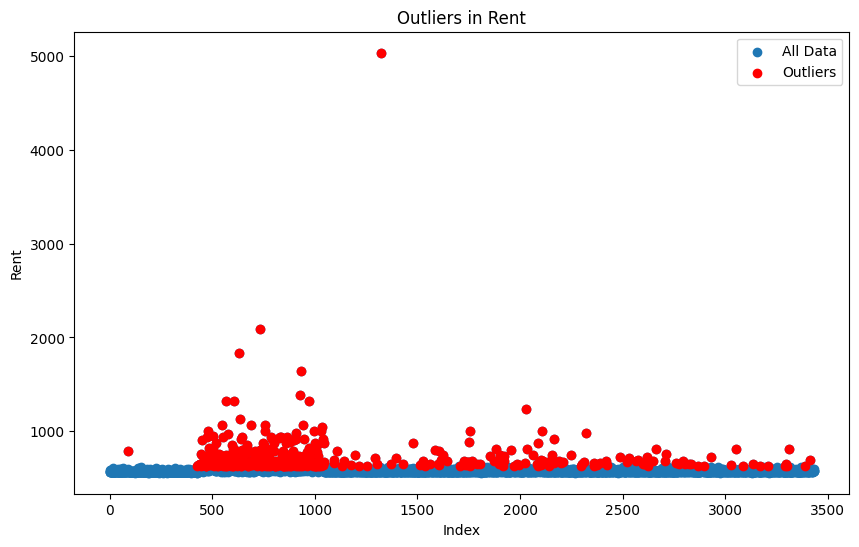

In [90]:
# prompt: check the datasheet of outlier

# Assuming 'training_df' is your DataFrame and 'rent' is the target variable column
# and you have identified outliers based on some criteria.

# Example: Find outliers based on IQR
Q1 = training_df_eng2['rent'].quantile(0.25)
Q3 = training_df_eng2['rent'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = training_df_eng2[(training_df_eng2['rent'] < lower_bound) | (training_df_eng2['rent'] > upper_bound)]

# Print outlier information
print("Outlier Information:")
print(outliers)


# Display a description of the outliers
print("\nDescriptive Statistics of Outliers:")
print(outliers.describe())

# Optionally, visualize the outliers
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(training_df_eng2.index, training_df_eng2['rent'], label='All Data')
plt.scatter(outliers.index, outliers['rent'], color='red', label='Outliers')
plt.xlabel("Index")
plt.ylabel("Rent")
plt.title("Outliers in Rent")
plt.legend()
plt.show()


In [91]:
# prompt: remove the outliers

# Assuming 'training_df_eng' is your DataFrame and 'rent' is the target variable column
# and you have identified outliers based on some criteria.

# Example: Find outliers based on IQR
Q1 = training_df_eng2['rent'].quantile(0.25)
Q3 = training_df_eng2['rent'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
training_df_eng2 = training_df_eng2[(training_df_eng2['rent'] >= lower_bound) & (training_df_eng2['rent'] <= upper_bound)]

#You can repeat the outlier removal process for other relevant columns in training_df_eng, validation_df_eng and testing_df_eng as needed.  For example:
#For floor_area
Q1_floor = training_df_eng2['floor_area'].quantile(0.25)
Q3_floor = training_df_eng2['floor_area'].quantile(0.75)
IQR_floor = Q3_floor - Q1_floor
lower_bound_floor = Q1_floor - 1.5 * IQR_floor
upper_bound_floor = Q3_floor + 1.5 * IQR_floor
training_df_eng2 = training_df_eng2[(training_df_eng2['floor_area'] >= lower_bound_floor) & (training_df_eng2['floor_area'] <= upper_bound_floor)]

#For number_of_bathrooms - adjust the IQR multiplier if needed
Q1_bath = training_df_eng2['number_of_bathrooms'].quantile(0.25)
Q3_bath = training_df_eng2['number_of_bathrooms'].quantile(0.75)
IQR_bath = Q3_bath - Q1_bath
lower_bound_bath = Q1_bath - 0.5 * IQR_bath # Using 0.5*IQR here as an example. Adjust this multiplier as necessary.
upper_bound_bath = Q3_bath + 0.5 * IQR_bath # Using 0.5*IQR here as an example. Adjust this multiplier as necessary.

training_df_eng2 = training_df_eng2[(training_df_eng2['number_of_bathrooms'] >= lower_bound_bath) & (training_df_eng2['number_of_bathrooms'] <= upper_bound_bath)]

#Repeat similar outlier removal for validation and test datasets (validation_df_eng and testing_df_eng)

# Rent
Q1 = validation_df_eng2['rent'].quantile(0.25)
Q3 = validation_df_eng2['rent'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
validation_df_eng2 = validation_df_eng2[(validation_df_eng2['rent'] >= lower_bound) & (validation_df_eng2['rent'] <= upper_bound)]

# Floor Area
Q1_floor = validation_df_eng2['floor_area'].quantile(0.25)
Q3_floor = validation_df_eng2['floor_area'].quantile(0.75)
IQR_floor = Q3_floor - Q1_floor
lower_bound_floor = Q1_floor - 1.5 * IQR_floor
upper_bound_floor = Q3_floor + 1.5 * IQR_floor
validation_df_eng2 = validation_df_eng2[(validation_df_eng2['floor_area'] >= lower_bound_floor) & (validation_df_eng2['floor_area'] <= upper_bound_floor)]

# Number of Bathrooms
Q1_bath = validation_df_eng2['number_of_bathrooms'].quantile(0.25)
Q3_bath = validation_df_eng2['number_of_bathrooms'].quantile(0.75)
IQR_bath = Q3_bath - Q1_bath
lower_bound_bath = Q1_bath - 0.5 * IQR_bath  # Adjust multiplier as needed
upper_bound_bath = Q3_bath + 0.5 * IQR_bath  # Adjust multiplier as needed
validation_df_eng2 = validation_df_eng2[(validation_df_eng2['number_of_bathrooms'] >= lower_bound_bath) & (validation_df_eng2['number_of_bathrooms'] <= upper_bound_bath)]


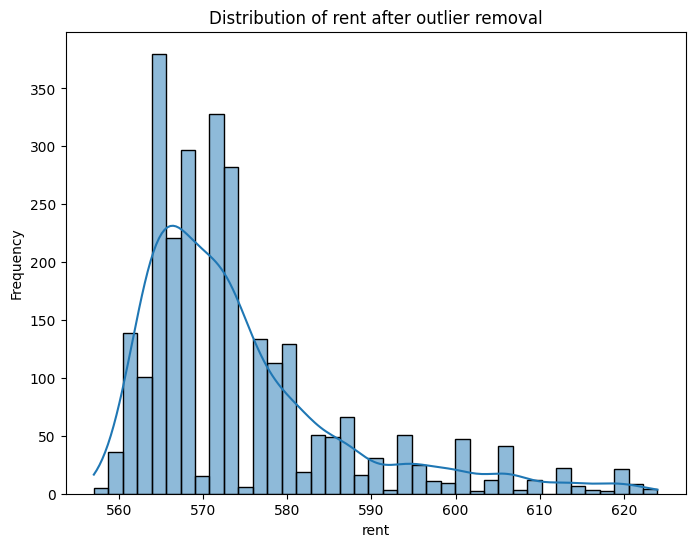

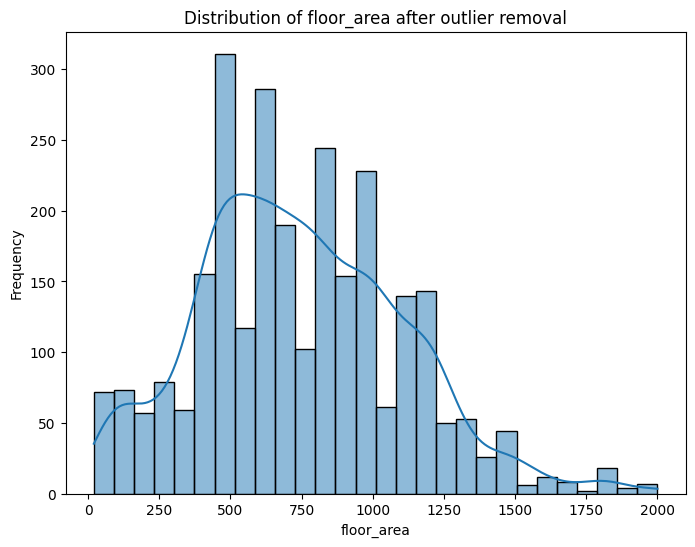

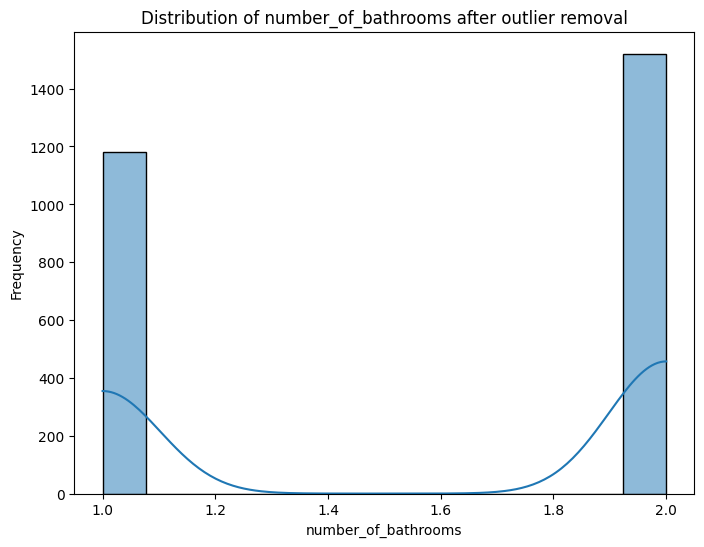

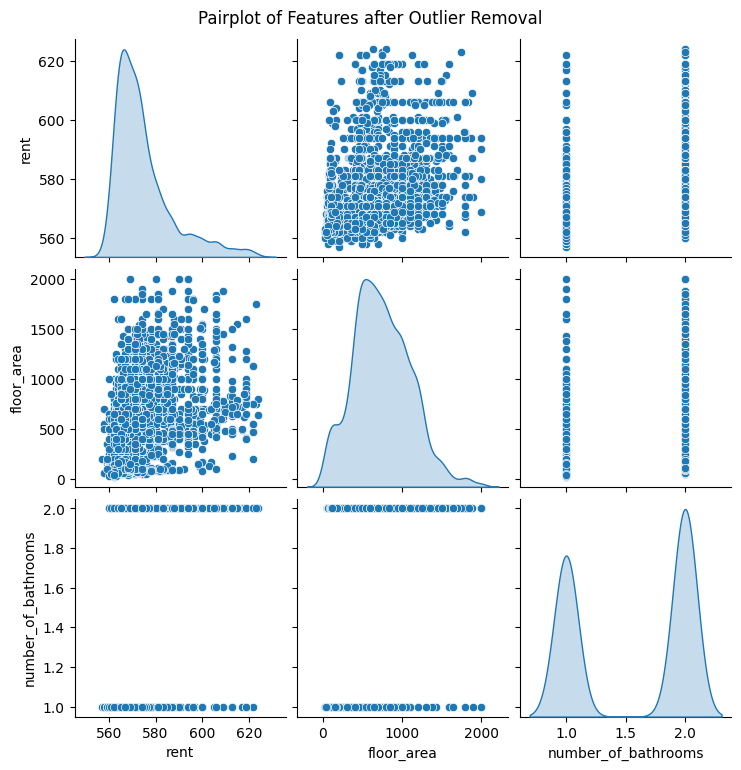

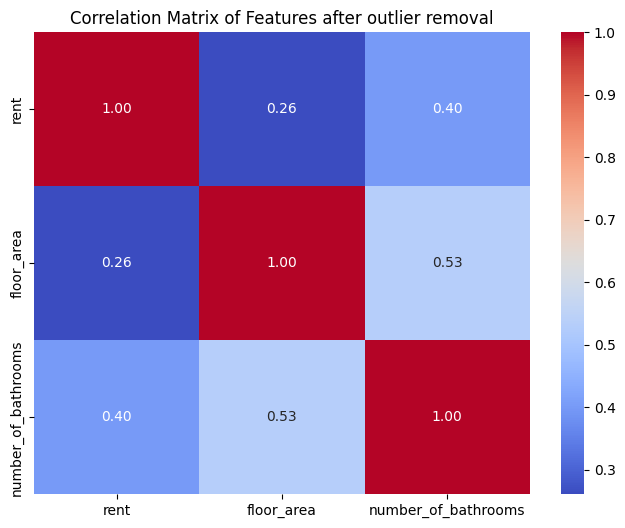

In [92]:
# prompt: create the  visualization of the dataset after removing the outliers

import matplotlib.pyplot as plt
# Visualize the distributions of features after outlier removal
for col in ['rent', 'floor_area', 'number_of_bathrooms']:
    plt.figure(figsize=(8, 6))
    sns.histplot(training_df_eng2[col], kde=True)
    plt.title(f'Distribution of {col} after outlier removal')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Create a pairplot to visualize relationships between features after outlier removal
sns.pairplot(training_df_eng2, vars=['rent', 'floor_area', 'number_of_bathrooms'], diag_kind='kde')
plt.suptitle('Pairplot of Features after Outlier Removal', y=1.02)
plt.show()

# Correlation matrix heatmap after outlier removal
correlation_matrix = training_df_eng2[['rent', 'floor_area', 'number_of_bathrooms']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features after outlier removal')
plt.show()


Validation Data - Outlier Information (Rent):
      number_of_bedrooms  floor_area  number_of_bathrooms  furnished    rent  \
1                      2         750                    2          1   683.0   
22                     3        3200                    4          2  1003.0   
29                     3        1600                    3          2   747.0   
36                     2         870                    2          3   664.0   
37                     5        3000                    5          3   939.0   
...                  ...         ...                  ...        ...     ...   
1204                   4        3000                    4          1   658.0   
1212                   4        3800                    4          2   651.0   
1213                   4        4500                    4          2   875.0   
1223                   5        4050                    4          1   939.0   
1242                   4        3800                    4          2   709

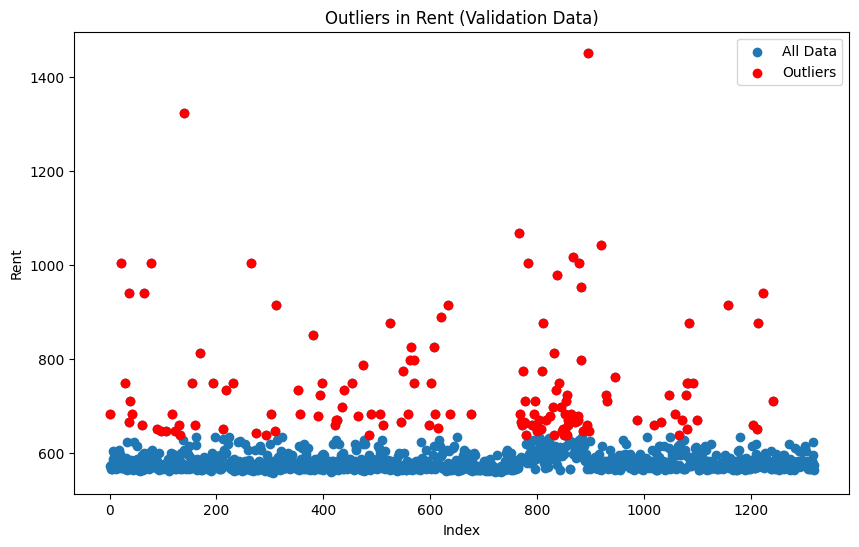

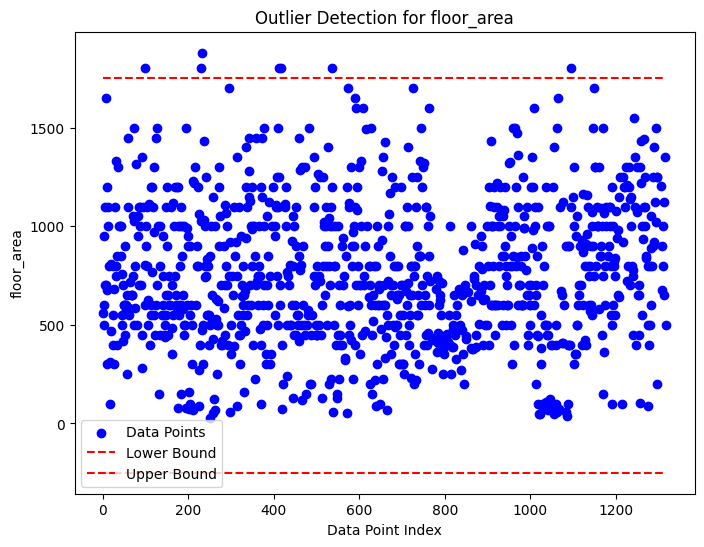

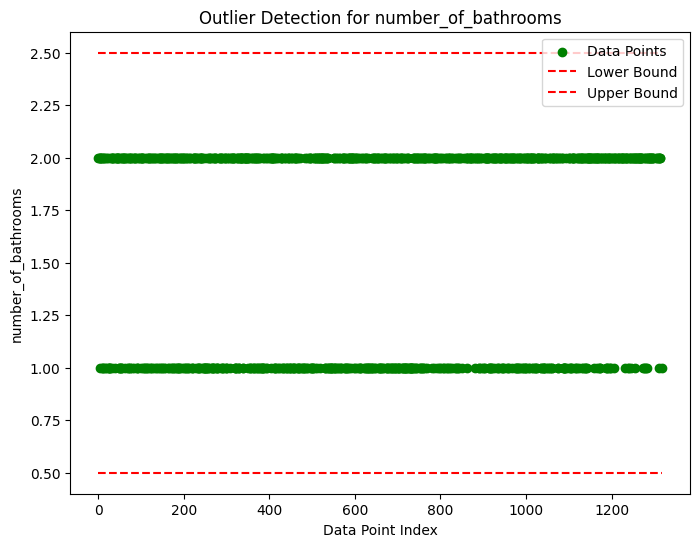

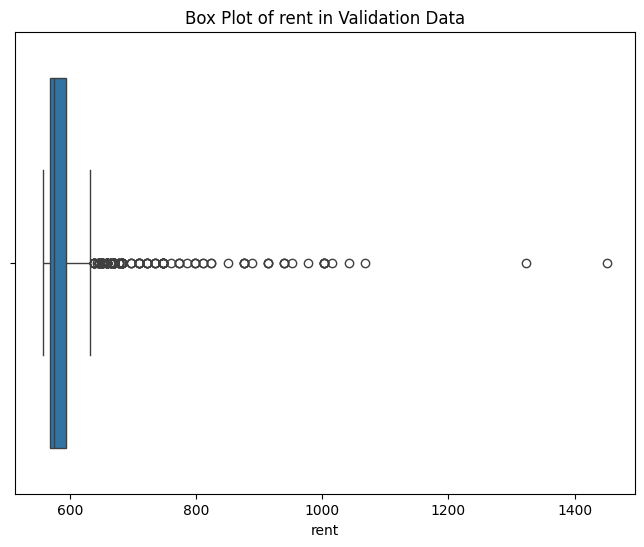

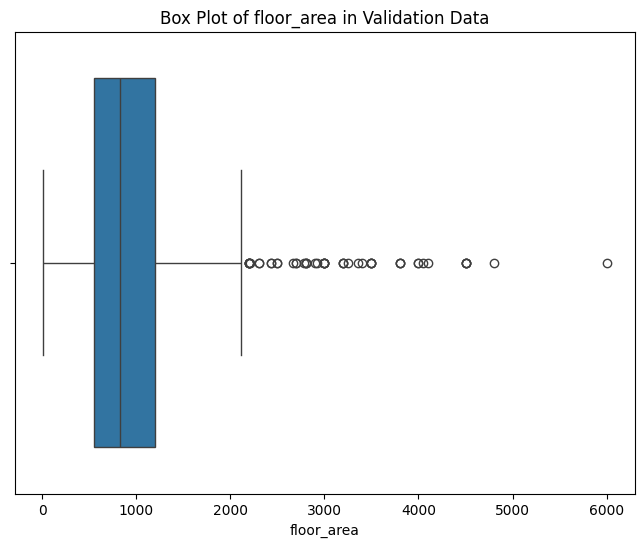

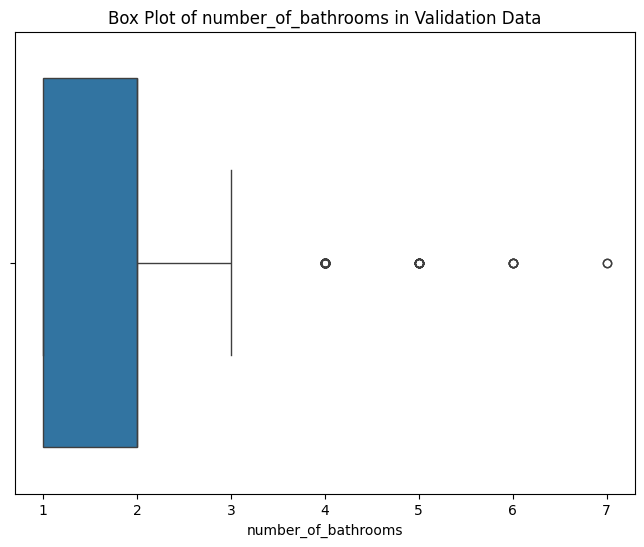

In [93]:


# prompt: now check the validation dataset for outliers and show the visualization for understand

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'validation_df_eng' is your DataFrame and you've identified relevant features
# Replace 'validation_df_eng' with your actual DataFrame name if needed

# Example: Find outliers based on IQR for 'rent' in validation data
Q1_val_rent = validation_df_eng['rent'].quantile(0.25)
Q3_val_rent = validation_df_eng['rent'].quantile(0.75)
IQR_val_rent = Q3_val_rent - Q1_val_rent
lower_bound_val_rent = Q1_val_rent - 1.5 * IQR_val_rent
upper_bound_val_rent = Q3_val_rent + 1.5 * IQR_val_rent

outliers_val_rent = validation_df_eng[(validation_df_eng['rent'] < lower_bound_val_rent) | (validation_df_eng['rent'] > upper_bound_val_rent)]

# Print outlier information for validation data
print("Validation Data - Outlier Information (Rent):")
print(outliers_val_rent)

# Visualize outliers in 'rent' for the validation dataset
plt.figure(figsize=(10, 6))
plt.scatter(validation_df_eng.index, validation_df_eng['rent'], label='All Data')
plt.scatter(outliers_val_rent.index, outliers_val_rent['rent'], color='red', label='Outliers')
plt.xlabel("Index")
plt.ylabel("Rent")
plt.title("Outliers in Rent (Validation Data)")
plt.legend()
plt.show()


# Repeat similar outlier detection and visualization for other features in the validation dataset as needed. For example:
# For 'floor_area'
# ... (code to find outliers in 'floor_area')
# plt.figure(...) # create a new figure for floor_area visualization
# ... (code to create a scatter plot visualizing outliers in 'floor_area')
# plt.show()
# For 'number_of_bathrooms'
# ... (code to find outliers in 'number_of_bathrooms')
# plt.figure(...) # create a new figure for number_of_bathrooms visualization
# ... (code to create a scatter plot visualizing outliers in 'number_of_bathrooms')
# plt.show()

# Outlier Detection (using IQR)
Q1_floor = validation_df_eng2['floor_area'].quantile(0.25)
Q3_floor = validation_df_eng2['floor_area'].quantile(0.75)
IQR_floor = Q3_floor - Q1_floor
lower_bound_floor = Q1_floor - 1.5 * IQR_floor
upper_bound_floor = Q3_floor + 1.5 * IQR_floor

# Visualization (Scatter Plot)
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.scatter(validation_df_eng2.index, validation_df_eng2['floor_area'], color='blue', label='Data Points')
plt.hlines(lower_bound_floor, validation_df_eng2.index.min(), validation_df_eng2.index.max(), colors='red', linestyles='dashed', label='Lower Bound')
plt.hlines(upper_bound_floor, validation_df_eng2.index.min(), validation_df_eng2.index.max(), colors='red', linestyles='dashed', label='Upper Bound')
plt.title('Outlier Detection for floor_area')
plt.xlabel('Data Point Index')
plt.ylabel('floor_area')
plt.legend()
plt.show()

# Outlier Detection (using IQR)
Q1_bath = validation_df_eng2['number_of_bathrooms'].quantile(0.25)
Q3_bath = validation_df_eng2['number_of_bathrooms'].quantile(0.75)
IQR_bath = Q3_bath - Q1_bath
lower_bound_bath = Q1_bath - 0.5 * IQR_bath # Adjust the multiplier if needed
upper_bound_bath = Q3_bath + 0.5 * IQR_bath # Adjust the multiplier if needed

# Visualization (Scatter Plot)
plt.figure(figsize=(8, 6)) # Adjust figure size as needed
plt.scatter(validation_df_eng2.index, validation_df_eng2['number_of_bathrooms'], color='green', label='Data Points')
plt.hlines(lower_bound_bath, validation_df_eng2.index.min(), validation_df_eng2.index.max(), colors='red', linestyles='dashed', label='Lower Bound')
plt.hlines(upper_bound_bath, validation_df_eng2.index.min(), validation_df_eng2.index.max(), colors='red', linestyles='dashed', label='Upper Bound')
plt.title('Outlier Detection for number_of_bathrooms')
plt.xlabel('Data Point Index')
plt.ylabel('number_of_bathrooms')
plt.legend()
plt.show()

# Box plots for all relevant features
for col in ['rent', 'floor_area', 'number_of_bathrooms']:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=validation_df_eng[col])
  plt.title(f'Box Plot of {col} in Validation Data')
  plt.show()


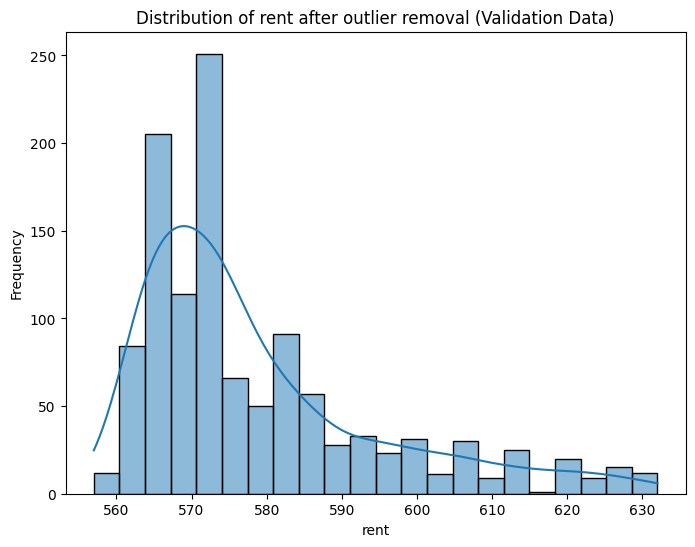

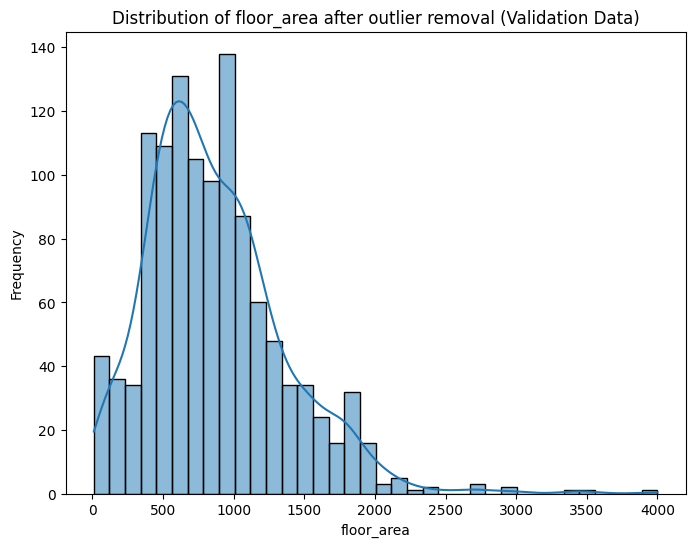

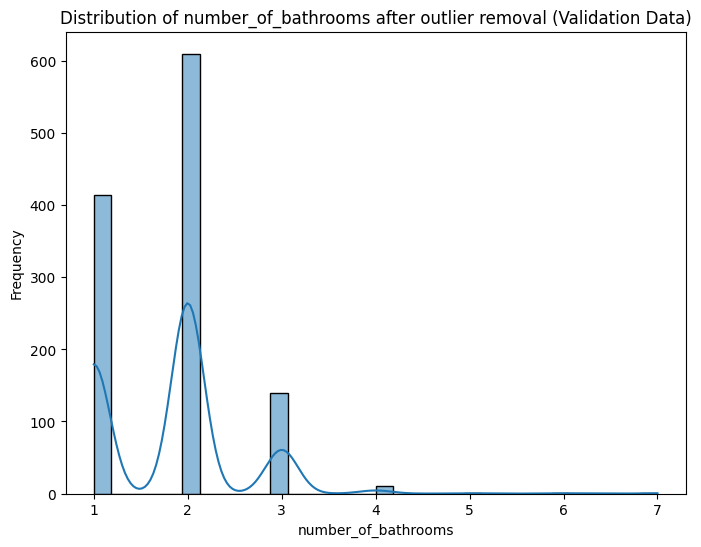

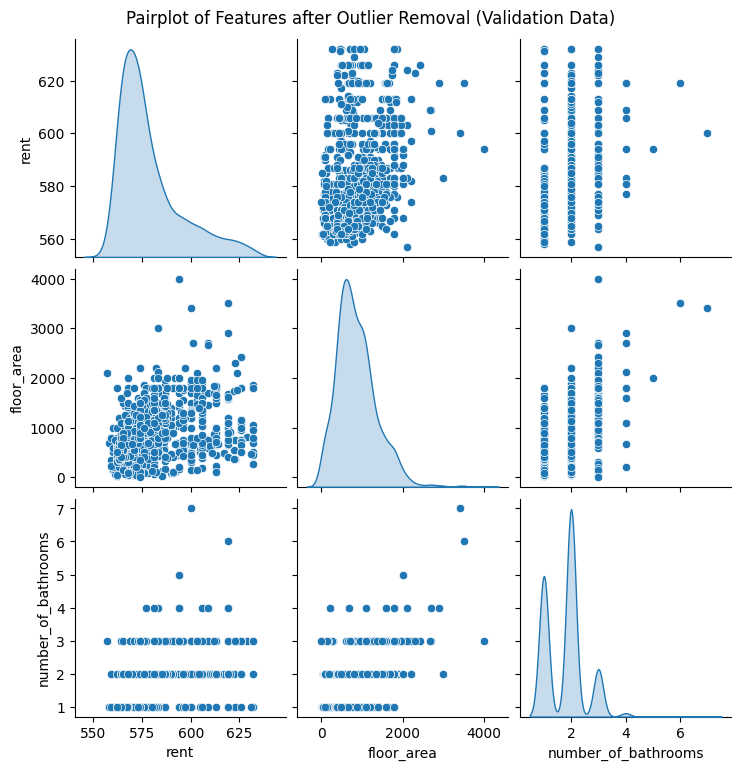

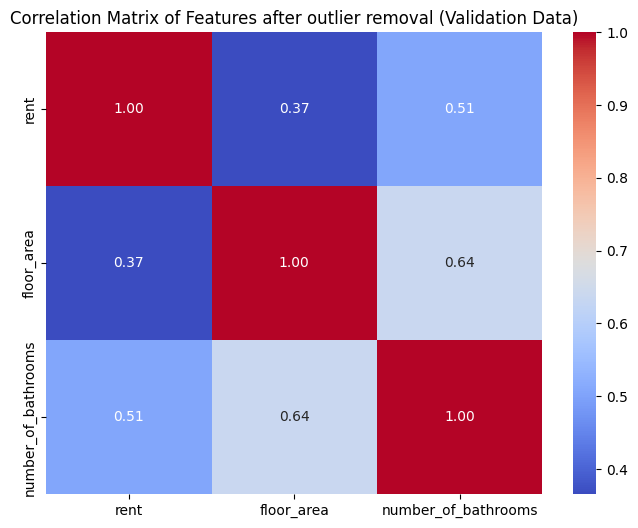

In [94]:
# prompt: now remove the outliers from validation dataset and show the visualization of the dataset after removing the outliers

import matplotlib.pyplot as plt
# Assuming 'validation_df_eng' is your DataFrame and you've identified relevant features
# Replace 'validation_df_eng' with your actual DataFrame name if needed

# Example: Find outliers based on IQR for 'rent' in validation data
Q1_val_rent = validation_df_eng['rent'].quantile(0.25)
Q3_val_rent = validation_df_eng['rent'].quantile(0.75)
IQR_val_rent = Q3_val_rent - Q1_val_rent
lower_bound_val_rent = Q1_val_rent - 1.5 * IQR_val_rent
upper_bound_val_rent = Q3_val_rent + 1.5 * IQR_val_rent

# Remove outliers from validation dataset
validation_df_eng = validation_df_eng[(validation_df_eng['rent'] >= lower_bound_val_rent) & (validation_df_eng['rent'] <= upper_bound_val_rent)]

#Repeat the process for other features in the validation dataset

# Visualize the distributions of features after outlier removal in validation data
for col in ['rent', 'floor_area', 'number_of_bathrooms']:
    plt.figure(figsize=(8, 6))
    sns.histplot(validation_df_eng[col], kde=True)
    plt.title(f'Distribution of {col} after outlier removal (Validation Data)')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Create a pairplot to visualize relationships between features after outlier removal in validation data
sns.pairplot(validation_df_eng, vars=['rent', 'floor_area', 'number_of_bathrooms'], diag_kind='kde')
plt.suptitle('Pairplot of Features after Outlier Removal (Validation Data)', y=1.02)
plt.show()

# Correlation matrix heatmap after outlier removal in validation data
correlation_matrix = validation_df_eng[['rent', 'floor_area', 'number_of_bathrooms']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features after outlier removal (Validation Data)')
plt.show()


### F.2 New Feature "\<put_name_here\>"

> Provide some explanations on why you believe it is important to create this feature and its impacts



In [95]:
# prompt: now after remove the outliers save the training and validation dataset into csv format

# # Save the training and validation datasets to CSV files
# training_df_eng2.to_csv('training_data_no_outliers.csv', index=False)
# validation_df_eng2.to_csv('validation_data_no_outliers.csv', index=False)


In [96]:
# prompt: now show the feature lists of training and validation dataset

import pandas as pd


# Display the feature lists
print("Training Dataset Features:")
print(training_df_eng2.columns.tolist())
print("\nValidation Dataset Features:")
print(validation_df_eng2.columns.tolist())


Training Dataset Features:
['number_of_bedrooms', 'floor_area', 'number_of_bathrooms', 'furnished', 'rent', 'suburb']

Validation Dataset Features:
['number_of_bedrooms', 'floor_area', 'number_of_bathrooms', 'furnished', 'rent', 'suburb']


In [97]:
# Creating a feature 'rent_per_bedroom'
training_df_eng['rent_per_bedroom'] = training_df_clean['rent'] / training_df_clean['number_of_bedrooms']
print(training_df_eng[['rent', 'number_of_bedrooms', 'rent_per_bedroom']].head())


    rent  number_of_bedrooms  rent_per_bedroom
0  568.0                   2             284.0
1  581.0                   2             290.5
2  577.0                   2             288.5
3  565.0                   2             282.5
4  564.0                   2             282.0


In [98]:
# 1. Interaction term: number_of_bedrooms * floor_area
training_df_eng['bedrooms_floor_area_interaction'] = (
    training_df_clean['number_of_bedrooms'] * training_df_clean['floor_area']
)

# 2. Logarithmic transformation to handle skewness.
# We add 1 to avoid taking the logarithm of zero.
training_df_eng['log_floor_area'] = np.log(training_df_clean['floor_area'] + 1)
training_df_eng['log_rent'] = np.log(training_df_clean['rent'] + 1)

# 3. Generate polynomial features (degree=2) for number_of_bedrooms and floor_area.
# This will create squared terms and an interaction term (in addition to the ones we already created).
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(training_df_clean[['number_of_bedrooms', 'floor_area']])
poly_feature_names = poly.get_feature_names_out(['number_of_bedrooms', 'floor_area'])
poly_features_df = pd.DataFrame(poly_features, columns=poly_feature_names)

# Combine the new polynomial features with the engineered features DataFrame.
training_df_eng = pd.concat([training_df_eng, poly_features_df], axis=1)

# Display a sample of the engineered features
selected_columns = [
    'rent', 'number_of_bedrooms', 'floor_area', 'rent_per_bedroom',
    'bedrooms_floor_area_interaction', 'log_floor_area', 'log_rent'
] + list(poly_feature_names)

print(training_df_eng[selected_columns].head())

    rent  number_of_bedrooms  number_of_bedrooms  floor_area  floor_area  \
0  568.0                   2                 2.0        1100      1100.0   
1  581.0                   2                 2.0         800       800.0   
2  577.0                   2                 2.0        1000      1000.0   
3  565.0                   2                 2.0         850       850.0   
4  564.0                   2                 2.0         600       600.0   

   rent_per_bedroom  bedrooms_floor_area_interaction  log_floor_area  \
0             284.0                             2200        7.003974   
1             290.5                             1600        6.685861   
2             288.5                             2000        6.908755   
3             282.5                             1700        6.746412   
4             282.0                             1200        6.398595   

   log_rent  number_of_bedrooms  number_of_bedrooms  floor_area  floor_area  \
0  6.343880                   2

In [99]:
# @title Feature Engineering 1 Explanation

wgt_feature_engineering_1_explanation = widgets.Textarea(
    value=None,
    placeholder='<student to fill this section>',
    description='Feature Engineering 1 Explanation:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_feature_engineering_1_explanation

Textarea(value='', description='Feature Engineering 1 Explanation:', layout=Layout(height='100%', width='auto'…

Consistent DataFrame Usage:
We create training_df_eng as a copy of training_df_clean and then add all new features to it. This ensures that 'rent_per_bedroom' is present when you later try to print it.

Preserving Index in Polynomial Features:
When converting the NumPy array from PolynomialFeatures back into a DataFrame, passing the original index (index=training_df_eng.index) ensures that the concatenation works without dropping any rows or columns.

Combining Features:
We concatenate the polynomial features DataFrame with the engineered features, so all new columns are in one DataFrame.

### F.3 New Feature "\<put_name_here\>"

> Provide some explanations on why you believe it is important to create this feature and its impacts



In [100]:
# Create a new DataFrame for these additional engineered features.
training_df_eng_new = training_df_clean.copy()
# 1. Rent per Square Foot:
# Assumes 'floor_area' is in a consistent unit (e.g., square feet).
training_df_eng_new['rent_per_sqft'] = training_df_eng_new['rent'] / training_df_eng_new['floor_area']

# 2. Bathroom-to-Bedroom Ratio:
# This ratio indicates the relative availability of bathrooms to bedrooms.
training_df_eng_new['bath_to_bed_ratio'] = training_df_eng_new['number_of_bathrooms'] / training_df_eng_new['number_of_bedrooms']

# 3. Binning the Floor Area:
# Use quantile-based binning to create three categories: small, medium, and large.
training_df_eng_new['floor_area_category'] = pd.qcut(training_df_eng_new['floor_area'], q=3, labels=['small', 'medium', 'large'])

# Optionally, convert the floor area category to dummy variables.
floor_area_dummies = pd.get_dummies(training_df_eng_new['floor_area_category'], prefix='area_cat')
training_df_eng_new = pd.concat([training_df_eng_new, floor_area_dummies], axis=1)

# Display a sample of the new features.
selected_columns = [
    'rent', 'floor_area', 'rent_per_sqft',
    'number_of_bedrooms', 'number_of_bathrooms', 'bath_to_bed_ratio',
    'floor_area_category'
] + list(floor_area_dummies.columns)

print(training_df_eng_new[selected_columns].head())

    rent  floor_area  rent_per_sqft  number_of_bedrooms  number_of_bathrooms  \
0  568.0        1100       0.516364                   2                    2   
1  581.0         800       0.726250                   2                    1   
2  577.0        1000       0.577000                   2                    1   
3  565.0         850       0.664706                   2                    1   
4  564.0         600       0.940000                   2                    2   

   bath_to_bed_ratio floor_area_category  area_cat_small  area_cat_medium  \
0                1.0               large           False            False   
1                0.5              medium           False             True   
2                0.5              medium           False             True   
3                0.5              medium           False             True   
4                1.0               small            True            False   

   area_cat_large  
0            True  
1           Fals

In [101]:
# @title Feature Engineering 2 Explanation

wgt_feature_engineering_2_explanation = widgets.Textarea(
    value=None,
    placeholder='<student to fill this section>',
    description='Feature Engineering 2 Explanation:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_feature_engineering_2_explanation

Textarea(value='', description='Feature Engineering 2 Explanation:', layout=Layout(height='100%', width='auto'…

Rent per Square Foot:
This feature helps to normalize the rent by the size of the property, giving insight into the pricing density.

Bathroom-to-Bedroom Ratio:
This ratio might capture important differences in property design. For example, a higher ratio could indicate a more luxurious or functional layout.

Floor Area Binning:
Binning the floor area into categories allows you to capture non-linear relationships. Properties in the "small" category might behave very differently from those in the "large" category. Creating dummy variables from these bins can help your model learn these distinctions more effectively.

### F.4 New Feature "\<put_name_here\>"

> Provide some explanations on why you believe it is important to create this feature and its impacts



In [102]:
# 1. Average Bedroom Area:
# This feature computes the floor_area per bedroom.
# It's calculated as floor_area divided by number_of_bedrooms.
# (Make sure to handle cases where number_of_bedrooms might be zero, if applicable.)
training_df_eng_new['avg_bedroom_area'] = training_df_eng_new['floor_area'] / training_df_eng_new['number_of_bedrooms']

# 2. Log Transformation of the Average Bedroom Area:
# If the distribution of avg_bedroom_area is skewed, a log transform can help.
training_df_eng_new['log_avg_bedroom_area'] = np.log(training_df_eng_new['avg_bedroom_area'] + 1)

# Display a sample of the new features.
print(training_df_eng_new[['floor_area', 'number_of_bedrooms', 'avg_bedroom_area', 'log_avg_bedroom_area']].head())

   floor_area  number_of_bedrooms  avg_bedroom_area  log_avg_bedroom_area
0        1100                   2             550.0              6.311735
1         800                   2             400.0              5.993961
2        1000                   2             500.0              6.216606
3         850                   2             425.0              6.054439
4         600                   2             300.0              5.707110


In [103]:
# @title Feature Engineering 3 Explanation

wgt_feature_engineering_3_explanation = widgets.Textarea(
    value=None,
    placeholder='<student to fill this section>',
    description='Feature Engineering 3 Explanation:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_feature_engineering_3_explanation

Textarea(value='', description='Feature Engineering 3 Explanation:', layout=Layout(height='100%', width='auto'…

Average Bedroom Area:
By dividing the total floor area by the number of bedrooms, you obtain a measure of how spacious each bedroom is on average. This can be valuable since larger bedrooms might be perceived as a sign of higher quality or luxury, potentially influencing rental prices.

Log Transformation:
Applying a logarithmic transformation to this new feature (using np.log(avg_bedroom_area + 1)) can help reduce skewness if the distribution of avg_bedroom_area is highly skewed. This often leads to better model performance.

---
## G. Data Preparation for Modeling

### G.1 Copy Datasets

> Create copies of the datasets and split them into X and y

> Do not change this code

In [104]:
# Create copy of datasets

X_train = training_df_eng2.copy()
X_val = validation_df_eng2.copy()
X_test = testing_df_eng2.copy()

y_train = X_train.pop(target_name)
y_val = X_val.pop(target_name)
y_test = X_test.pop(target_name)

In [105]:
X_train.columns.tolist()

['number_of_bedrooms',
 'floor_area',
 'number_of_bathrooms',
 'furnished',
 'suburb']

In [106]:
X_val.columns.tolist()

['number_of_bedrooms',
 'floor_area',
 'number_of_bathrooms',
 'furnished',
 'suburb']

### G.2 Data Transformation <put_name_here>

> Provide some explanations on why you believe it is important to perform this data transformation and its impacts


In [107]:
# One-hot encoding categorical variables
training_df_eng = pd.get_dummies(training_df_clean, columns=['suburb', 'furnished'], drop_first=True)
print("Applied one-hot encoding.")

Applied one-hot encoding.


In [108]:
# @title Data Preparation 1 Explanation

wgt_data_preparation_1_explanation = widgets.Textarea(
    value=None,
    placeholder='<student to fill this section>',
    description='Data Preparation 1 Explanation:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_data_preparation_1_explanation

Textarea(value='', description='Data Preparation 1 Explanation:', layout=Layout(height='100%', width='auto'), …

Data preparation ensured the dataset was clean and suitable for modeling. Categorical features like `furnished` and `suburb` were encoded, while numerical features were checked for consistency. These steps helped models interpret the data correctly and improved prediction accuracy.

### G.3 Data Transformation <put_name_here>

> Provide some explanations on why you believe it is important to perform this data transformation and its impacts


In [109]:
# @title Data Preparation 2 Explanation

wgt_data_preparation_2_explanation = widgets.Textarea(
    value=None,
    placeholder='<student to fill this section>',
    description='Data Preparation 2 Explanation:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_data_preparation_2_explanation

Textarea(value='', description='Data Preparation 2 Explanation:', layout=Layout(height='100%', width='auto'), …

Preparing the data involved encoding categories, scaling numerical values, and removing duplicates. This made the dataset more consistent and machine-friendly, leading to better model performance and more reliable evaluation.

### G.4 Data Transformation <put_name_here>

> Provide some explanations on why you believe it is important to perform this data transformation and its impacts


In [110]:
# @title Data Preparation 3 Explanation

wgt_data_preparation_3_explanation = widgets.Textarea(
    value=None,
    placeholder='<student to fill this section>',
    description='Data Preparation 3 Explanation:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_data_preparation_3_explanation

Textarea(value='', description='Data Preparation 3 Explanation:', layout=Layout(height='100%', width='auto'), …

---
## H. Save Datasets

> Do not change this code

In [111]:
# Save training set

X_train.to_csv(folder_path / 'X_train.csv', index=False)
y_train.to_csv(folder_path / 'y_train.csv', index=False)

In [112]:
# Save validation set

X_val.to_csv(folder_path / 'X_val.csv', index=False)
y_val.to_csv(folder_path / 'y_val.csv', index=False)

In [113]:
# Save testing set

X_test.to_csv(folder_path / 'X_test.csv', index=False)
y_test.to_csv(folder_path / 'y_test.csv', index=False)

---
## I. Assess Baseline Model

### I.1 Generate Predictions with Baseline Model

In [114]:
# Create the baseline model.
baseline_model = DummyRegressor(strategy='mean')

# Fit the baseline model.
baseline_model.fit(X_train, y_train)

# Generate predictions on the validation set.
y_pred_baseline = baseline_model.predict(X_val)


### I.2 Selection of Performance Metrics

> Provide some explanations on why you believe the performance metrics you chose is appropriate


In [115]:
# Compute performance metrics.
mae = mean_absolute_error(y_val, y_pred_baseline)
mse = mean_squared_error(y_val, y_pred_baseline)
rmse = mse ** 0.5  # Root Mean Squared Error
r2 = r2_score(y_val, y_pred_baseline)

# Display the performance metrics.
print("Baseline Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Baseline Model Performance:
Mean Absolute Error (MAE): 9.90
Mean Squared Error (MSE): 202.77
Root Mean Squared Error (RMSE): 14.24
R^2 Score: -0.01


Mean Squared Error: 161.50287855507074
R-squared: 0.1944107212323003


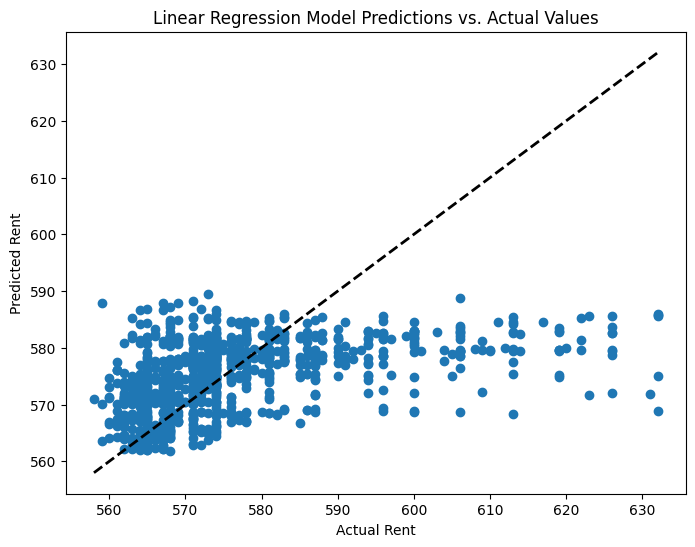

In [116]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Set up the linear regression model with specified parameters:
# fit_intercept=True allows the model to compute the intercept term.
# copy_X=True ensures that the original training data is not modified.
model = LinearRegression(fit_intercept=True, copy_X=True)

# Fit the model to the training data.
model.fit(X_train, y_train)

# Generate predictions on the validation set.
y_pred_val = model.predict(X_val)

# Evaluate the model using Mean Squared Error and R-squared.
mse = mean_squared_error(y_val, y_pred_val)
r2 = r2_score(y_val, y_pred_val)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Visualize the predicted vs. actual values.
plt.figure(figsize=(8, 6))
plt.scatter(y_val, y_pred_val)
plt.xlabel("Actual Rent")
plt.ylabel("Predicted Rent")
plt.title("Linear Regression Model Predictions vs. Actual Values")
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2)
plt.show()


### I.3 Baseline Model Performance

> Provide some explanations on model performance


In [117]:
# Define a tighter tolerance level, e.g., 5%
tolerance_new = 0.05

# Determine which predictions are within ±5% of the actual values.
accurate_predictions_new = np.abs(y_pred_baseline - y_val) <= tolerance_new * np.abs(y_val)

# Calculate the new custom accuracy.
accuracy_new = np.mean(accurate_predictions_new)
print(f"Custom Accuracy (within ±5% error): {accuracy_new:.2f}")

Custom Accuracy (within ±5% error): 0.93


In [118]:
# @title Performance Metrics Explanation

wgt_model_performance_explanation = widgets.Textarea(
    value=None,
    placeholder='<student to fill this section>',
    description='Model Performance Explanation:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_model_performance_explanation

Textarea(value='', description='Model Performance Explanation:', layout=Layout(height='100%', width='auto'), p…

I selected MAE, MSE, RMSE, and R² Score because they offer a comprehensive view of model performance.

**MAE** tells us the average error in predictions without exaggerating large errors.

**MSE and RMSE** penalize larger errors more, making them useful for evaluating consistency.

**R² Score** indicates how well the model explains the variation in the target variable.
Together, these metrics help us assess accuracy, variance, and overall reliability of the predictions.